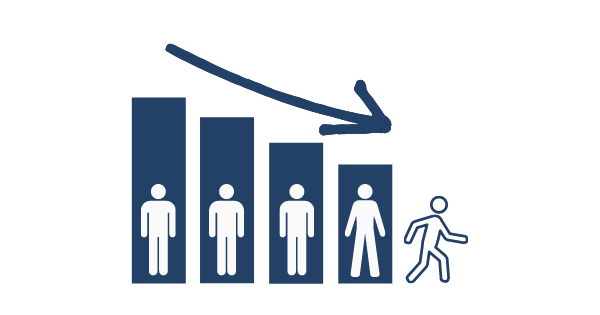

### **Introducción**

---



El churn o tasa de cancelación de clientes es el procentaje de clientes que dejan de utilizar los servicios que ofrece una empresa por un periodo de tiempo determinado.

La retención de clientes es un gran desafío para cualquier empresa.

Una compañia que puede averiguar que clientes van a abandonar y los motivos es capaz de tomar acciones proactivas para retener a sus clientes valiosos .

El objetivo de este proyecto es clasificar si un cliente abandona o no e identificar que valores contribuyen a la pérdida de clientes.

Para ello seleccionamos un dataset de clientes bancarios con las variables abajo descritas y sobre el cual aplicaremos las técnicas de Machine Learning adquiridas a fin de conseguir el mejor modelo para llegar a nuestro objetivo.

1. RowNumber—corresponds to the record (row) number and has no effect on the output.
2. CustomerId—contains random values and has no effect on customer leaving the bank.
3. Surname—the surname of a customer has no impact on their decision to leave the bank.
4. CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
5. Geography—a customer’s location can affect their decision to leave the bank.
6. Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank. (0=mujer, 1=hombre)
7. Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
8. Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
9. Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
10. NumOfProducts—refers to the number of products that a customer has purchased through the bank.
11. HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
12. IsActiveMember—active customers are less likely to leave the bank.
13. EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
14. Exited—whether or not the customer left the bank.

### **Análisis**

---

> **Librerías**: lo primero será importar las librerías a utilizar.

In [ ]:
#basic libraries
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import seaborn as sns

#model libraries
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (r2_score, roc_auc_score,
                            classification_report,
                            roc_curve, auc)


#others
import math
import warnings
warnings.filterwarnings('ignore')

> Importamos **dataset** y validamos carga

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/BEDU/Python/Fase IV/Churn_Modelling.csv')
df.head(5)

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

> **Exploramos** la información

In [ ]:
# Validamos número de registros y variables
df.shape

(10000, 14)

In [ ]:
#Validamos columnas y tipo de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

> Validación y limpieza general del dataset (eliminación de NaNs, duplicados, renombramiento de índice y columnas, formateo de strings, etc) para que esté listo para ser analizado

In [ ]:
#Identificamos valores nulos
nulos=df.isna().sum().sum()

In [ ]:
df.isna().sum().any()

False

In [ ]:
#Verificamos valores duplicados y eliminamos si corresponde
duplicados=df.duplicated().sum()

In [ ]:
#Eliminamos columnas que no serán necesarias para nuestro análisis
df_filtered=df.drop(columns=["CustomerId", "Surname","RowNumber"])
df_filtered.head(5)

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [ ]:
#Renombramos columnas para mejor entendimiento
#Lo primero será crear un diccionario para mapear los nuevos nombres

mapeo_nombre_columnas = {
    'CreditScore': 'score_crediticio',
    'Geography': 'pais_residencia',
    'Gender': 'genero',
    'Age': 'edad',
    'Tenure': 'antigüedad_cliente',
    'Balance': 'balance',
    'NumOfProducts': 'numero_productos',
    'HasCrCard': 'tieneTC',
    'IsActiveMember': 'miembro_activo',
    'EstimatedSalary': 'salario_estimado',
    'Exited': 'abandono'
}

In [ ]:
#Renombranos
df_filtered.rename(columns=mapeo_nombre_columnas,inplace=True)
df_filtered.head(5)

score_crediticio pais_residencia  genero  edad  antigüedad_cliente  \
0               619          France  Female    42                   2   
1               608           Spain  Female    41                   1   
2               502          France  Female    42                   8   
3               699          France  Female    39                   1   
4               850           Spain  Female    43                   2   

     balance  numero_productos  tieneTC  miembro_activo  salario_estimado  \
0       0.00                 1        1               1         101348.88   
1   83807.86                 1        0               1         112542.58   
2  159660.80                 3        1               0         113931.57   
3       0.00                 2        0               0          93826.63   
4  125510.82                 1        1               1          79084.10   

   abandono  
0         1  
1         0  
2         1  
3         0  
4         0

In [ ]:
#Tipos de datos por variable
df_filtered.dtypes

score_crediticio        int64
pais_residencia        object
genero                 object
edad                    int64
antigüedad_cliente      int64
balance               float64
numero_productos        int64
tieneTC                 int64
miembro_activo          int64
salario_estimado      float64
abandono                int64
dtype: object

In [ ]:
types = df_filtered.dtypes.value_counts()

In [ ]:
#Verificamos balanceo de dataset, se observa un desbalance entre las categorías a predecir el cual será tratado en el modelo usando la técnica de SMOTE
conteo=df_filtered["abandono"].value_counts()
porc_churn = (conteo[1] / (conteo[0] + conteo[1])) * 100

> **Resumen** de exploración inicial y limpieza de dataset

In [ ]:
print("Churn Rate = %.1f %%"%(porc_churn))
print('Numero de registros duplicados: %d'%(duplicados))
print('Numero de valores nulos: %d'%(nulos))
print('Numero de variables: %d'%(df_filtered.shape[1]))
print('Numero de registros: %d'%(df.shape[0]))
print('Tipos de datos y frecuencia:')
print(types)

Churn Rate = 20.4 %
Numero de registros duplicados: 0
Numero de valores nulos: 0
Numero de variables: 11
Numero de registros: 10000
Tipos de datos y frecuencia:
int64      7
object     2
float64    2
dtype: int64


Primeros Hallazgos:
* Tenemos 7 variables categóricas
* Tenemos 2 variables numéricas continuas
* Tenemos 2 variables numéricas discretas

* Detectamos un desblanceo entre las clases de la variable dependiente, el cual será tratado en el modelo con el **método SMOTE**

### > **Análisis Exploratorio**

---



In [ ]:
#Analizamos algunas primeras métricas

df_filtered.describe().T

count           mean           std     min       25%  \
score_crediticio    10000.0     650.528800     96.653299  350.00    584.00   
edad                10000.0      38.921800     10.487806   18.00     32.00   
antigüedad_cliente  10000.0       5.012800      2.892174    0.00      3.00   
balance             10000.0   76485.889288  62397.405202    0.00      0.00   
numero_productos    10000.0       1.530200      0.581654    1.00      1.00   
tieneTC             10000.0       0.705500      0.455840    0.00      0.00   
miembro_activo      10000.0       0.515100      0.499797    0.00      0.00   
salario_estimado    10000.0  100090.239881  57510.492818   11.58  51002.11   
abandono            10000.0       0.203700      0.402769    0.00      0.00   

                           50%          75%        max  
score_crediticio       652.000     718.0000     850.00  
edad                    37.000      44.0000      92.00  
antigüedad_cliente       5.000       7.0000      10.00  
balance              97198.540  127644.2400  250898.09  
numero_productos         1.000       2.0000       4.00  
tieneTC                  1.000       1.0000       1.00  
miembro_activo           1.000       1.0000       1.00  
salario_estimado    100193.915  149388.2475  199992.48  
abandono                 0.000       0.0000       1.00

In [ ]:
#Generamos una función que calcule los estimados de locación que deseamos con mayor detalle

def estimados_locacion(valor):
  print(f'Valor mínimo: {valor.min()}')
  print(f'Media truncada: {stats.trim_mean(valor, 0.1)}')
  print(f'Media: {valor.mean()}')
  print(f'Desviacion estandar: {valor.std()}')
  print(f'Percentil 10: {valor.quantile(0.1)}')
  print(f'Percentil 25: {valor.quantile(0.25)}')
  print(f'Percentil 50: {valor.median()}')
  print(f'Percentil 75: {valor.quantile(0.75)}')
  print(f'Percentil 90: {valor.quantile(0.9)}')
  print(f'Valor máximo: {valor.max()}')
  print(f'Rango: {valor.max()-valor.min()}')
  print(f'Rango intercuartilico: {valor.quantile(0.75)-valor.quantile(0.25)}')

  return

In [ ]:
#Aplicamos a variables numéricas
estimados_locacion(df_filtered["score_crediticio"])

Valor mínimo: 350
Media truncada: 651.010625
Media: 650.5288
Desviacion estandar: 96.65329873613035
Percentil 10: 521.0
Percentil 25: 584.0
Percentil 50: 652.0
Percentil 75: 718.0
Percentil 90: 778.0
Valor máximo: 850
Rango: 500
Rango intercuartilico: 134.0


In [ ]:
estimados_locacion(df_filtered["edad"])

Valor mínimo: 18
Media truncada: 37.91475
Media: 38.9218
Desviacion estandar: 10.487806451704609
Percentil 10: 27.0
Percentil 25: 32.0
Percentil 50: 37.0
Percentil 75: 44.0
Percentil 90: 53.0
Valor máximo: 92
Rango: 74
Rango intercuartilico: 12.0


In [ ]:
estimados_locacion(df_filtered["balance"])

Valor mínimo: 0.0
Media truncada: 74827.7952525
Media: 76485.889288
Desviacion estandar: 62397.405202385955
Percentil 10: 0.0
Percentil 25: 0.0
Percentil 50: 97198.54000000001
Percentil 75: 127644.24
Percentil 90: 149244.79200000002
Valor máximo: 250898.09
Rango: 250898.09
Rango intercuartilico: 127644.24


In [ ]:
estimados_locacion(df_filtered["salario_estimado"])

Valor mínimo: 11.58
Media truncada: 100114.86163249999
Media: 100090.239881
Desviacion estandar: 57510.49281769816
Percentil 10: 20273.58
Percentil 25: 51002.11
Percentil 50: 100193.915
Percentil 75: 149388.2475
Percentil 90: 179674.704
Valor máximo: 199992.48
Rango: 199980.90000000002
Rango intercuartilico: 98386.1375


Observaciones.

1) En la variable edad el 90% de los datos se encuentran abajo de la edad de 53 años.

2) Hay indicios de valores atipicos ya que el valor maximo esta en 92 años.

3) En la variable Balance al menos el 25% de los datos tinen un valor igual a cero.


> **** Visualización (boxplot)**

In [ ]:
# Definimos una función para generar los boxplot
def boxplot (dataframe, column_1, i):
    sns.boxplot(y = dataframe[column_1], ax=axes[i],palette="YlGnBu_r")
    axes[i].set(xlabel='', ylabel='', title= column_1)

In [ ]:
df_variables_numericas = df_filtered[['score_crediticio','edad', 'balance', 'salario_estimado',"abandono"]]
df_variables_numericas.head(5)
df_variables_numericas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   score_crediticio  10000 non-null  int64  
 1   edad              10000 non-null  int64  
 2   balance           10000 non-null  float64
 3   salario_estimado  10000 non-null  float64
 4   abandono          10000 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 390.8 KB


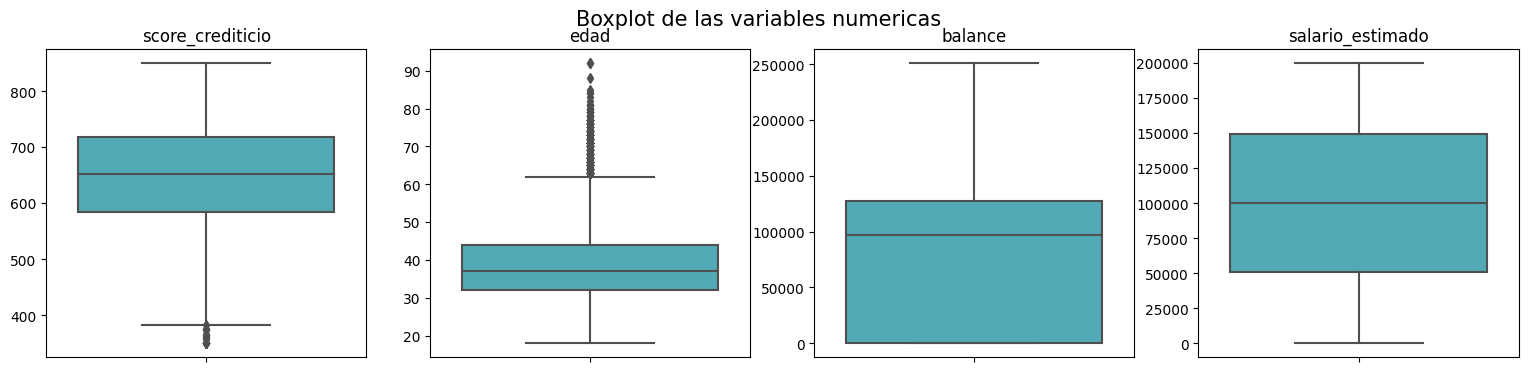

In [ ]:
#Generamos boxplot de variables numéricas
fig, axes = plt.subplots(1,4, figsize=(19, 4))
lista = list(df_variables_numericas.columns)

for n in range(0,4):
    key = lista[n]
    boxplot (df_variables_numericas, key, n)


fig.suptitle('Boxplot de las variables numericas', fontsize=15);

Hallazgo:

* Para la variable **edad** detectamos algunos outliers los cuales decidiremos eliminarlos para el modelo a través de la **técnica de clipping**
* Para la variable **balance** detectamos cerca de un 36% de valores en cero, los cuales bajo el contexto del dataset y del análisis son correctos y se mantiene para considerar en el modelo

In [ ]:
#Usando scrore intercuartilico verificamos como afecta a la distribución si eliminamos outliers de la variable edad
iqr = df_variables_numericas['edad'].quantile(0.75) - df_variables_numericas['edad'].quantile(0.25)
filtro_inferior = df_variables_numericas['edad'] > df_variables_numericas['edad'].quantile(0.25) - (iqr * 1.5)
filtro_superior = df_variables_numericas['edad'] < df_variables_numericas['edad'].quantile(0.75) + (iqr * 1.5)

In [ ]:
df_score = df_variables_numericas[filtro_superior & filtro_inferior]
df_score.shape

#Los outliers corresponden al 4% del total de nuestro dataset

(9589, 5)

In [ ]:
#Calculamos estimados de locación del nuevo dataframe con la función previamente definida
estimados_locacion(df_score[ 'score_crediticio'])

Valor mínimo: 350
Media truncada: 650.7824840349276
Media: 650.2878298049849
Desviacion estandar: 96.66057494673838
Percentil 10: 521.0
Percentil 25: 583.0
Percentil 50: 652.0
Percentil 75: 717.0
Percentil 90: 777.0
Valor máximo: 850
Rango: 500
Rango intercuartilico: 134.0


In [ ]:
estimados_locacion(df_score[ 'edad'])

Valor mínimo: 18
Media truncada: 37.216082366740515
Media: 37.66044425904683
Desviacion estandar: 8.644055295952013
Percentil 10: 27.0
Percentil 25: 32.0
Percentil 50: 37.0
Percentil 75: 43.0
Percentil 90: 50.0
Valor máximo: 61
Rango: 43
Rango intercuartilico: 11.0


In [ ]:
estimados_locacion(df_score[ 'balance'])

Valor mínimo: 0.0
Media truncada: 74887.05529779746
Media: 76552.23676087183
Desviacion estandar: 62422.13327249555
Percentil 10: 0.0
Percentil 25: 0.0
Percentil 50: 97266.1
Percentil 75: 127661.69
Percentil 90: 149401.252
Valor máximo: 250898.09
Rango: 250898.09
Rango intercuartilico: 127661.69


In [ ]:
estimados_locacion(df_score[ 'salario_estimado'])

Valor mínimo: 11.58
Media truncada: 100252.94610582563
Media: 100200.27840129317
Desviacion estandar: 57500.95610527151
Percentil 10: 20192.334000000003
Percentil 25: 51226.32
Percentil 50: 100335.55
Percentil 75: 149458.73
Percentil 90: 179638.926
Valor máximo: 199992.48
Rango: 199980.90000000002
Rango intercuartilico: 98232.41


Observaciones:

1) La variable edad dejo de tener muchos valores atipicos.

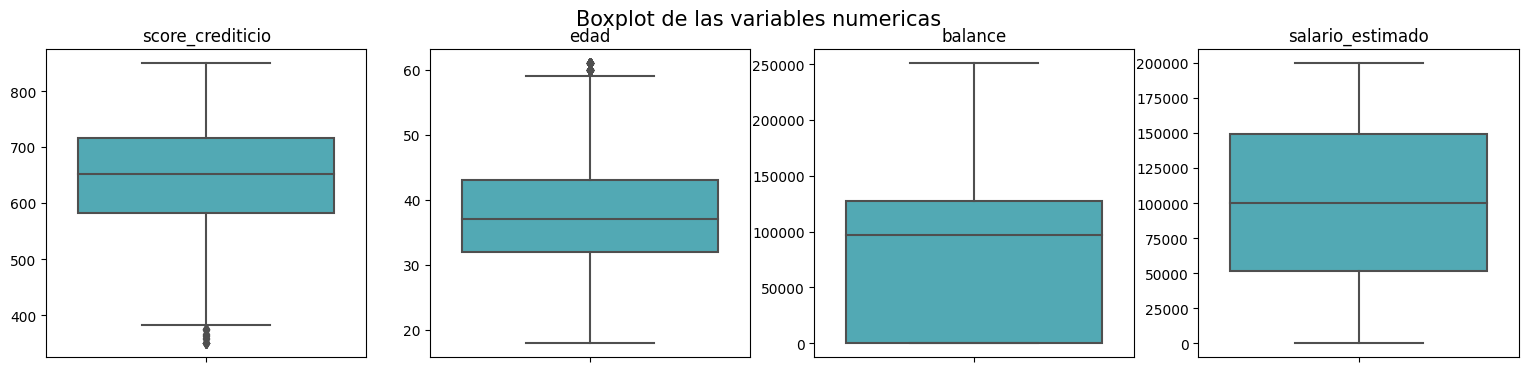

In [ ]:
#Generamos nuevamente boxplots

fig, axes = plt.subplots(1,4, figsize=(19, 4))
lista = list(df_score.columns)

for n in range(0,4):
    key = lista[n]
    boxplot(df_score, key, n)

fig.suptitle('Boxplot de las variables numericas', fontsize=15);

In [ ]:
#Generamos tablas de frecuencia e histogramas

def tabla_frecuencia(dataframe, column):
    longitud_muestra = dataframe.shape[0]
    numero_clases = round(1 + ( 3.3 * math.log10(longitud_muestra) ))
    segmentos = pd.cut(dataframe[column], numero_clases)
    tabla = dataframe[column].groupby(segmentos).count()
    print(f'El numero de clases es: {numero_clases}')
    return tabla

Tablas de frecuencia

In [ ]:
tabla_frecuencia(df_score,'score_crediticio')

El numero de clases es: 14


score_crediticio
(349.5, 385.714]        16
(385.714, 421.429]      43
(421.429, 457.143]     162
(457.143, 492.857]     302
(492.857, 528.571]     570
(528.571, 564.286]     801
(564.286, 600.0]      1057
(600.0, 635.714]      1230
(635.714, 671.429]    1363
(671.429, 707.143]    1324
(707.143, 742.857]     990
(742.857, 778.571]     797
(778.571, 814.286]     478
(814.286, 850.0]       456
Name: score_crediticio, dtype: int64

In [ ]:
tabla_frecuencia(df_score,'edad')

El numero de clases es: 14


edad
(17.957, 21.071]     142
(21.071, 24.143]     315
(24.143, 27.214]     563
(27.214, 30.286]     948
(30.286, 33.357]    1264
(33.357, 36.429]    1377
(36.429, 39.5]      1378
(39.5, 42.571]      1119
(42.571, 45.643]     783
(45.643, 48.714]     569
(48.714, 51.786]     400
(51.786, 54.857]     260
(54.857, 57.929]     227
(57.929, 61.0]       244
Name: edad, dtype: int64

In [ ]:
tabla_frecuencia(df_score,'balance')

El numero de clases es: 14


balance
(-250.898, 17921.292]       3470
(17921.292, 35842.584]        13
(35842.584, 53763.876]        73
(53763.876, 71685.169]       241
(71685.169, 89606.461]       595
(89606.461, 107527.753]     1147
(107527.753, 125449.045]    1463
(125449.045, 143370.337]    1300
(143370.337, 161291.629]     761
(161291.629, 179212.921]     361
(179212.921, 197134.214]     123
(197134.214, 215055.506]      37
(215055.506, 232976.798]       3
(232976.798, 250898.09]        2
Name: balance, dtype: int64

In [ ]:
tabla_frecuencia(df_score,'salario_estimado')

El numero de clases es: 14


salario_estimado
(-188.401, 14295.93]      692
(14295.93, 28580.28]      671
(28580.28, 42864.63]      646
(42864.63, 57148.98]      687
(57148.98, 71433.33]      683
(71433.33, 85717.68]      715
(85717.68, 100002.03]     685
(100002.03, 114286.38]    699
(114286.38, 128570.73]    708
(128570.73, 142855.08]    676
(142855.08, 157139.43]    667
(157139.43, 171423.78]    682
(171423.78, 185708.13]    705
(185708.13, 199992.48]    673
Name: salario_estimado, dtype: int64

> **** Visualización (histogramas)**

In [ ]:
# Definimos función para generar histogramas
def histograma(dataframe, column, i):
    longitud_muestra = dataframe.shape[0]
    bines = int(1 + ( 3.3 * math.log10(longitud_muestra) ))
    sns.distplot(dataframe[column], ax=axes[i], kde=False, norm_hist=False, bins=bines, color="darkblue")
    axes[i].set(xlabel='', ylabel='conteo', title= column)
    print(f'El numero de clases es: {bines}')

El numero de clases es: 14
El numero de clases es: 14
El numero de clases es: 14
El numero de clases es: 14


Text(0.5, 0.98, 'Histograma de las variables numericas con score')

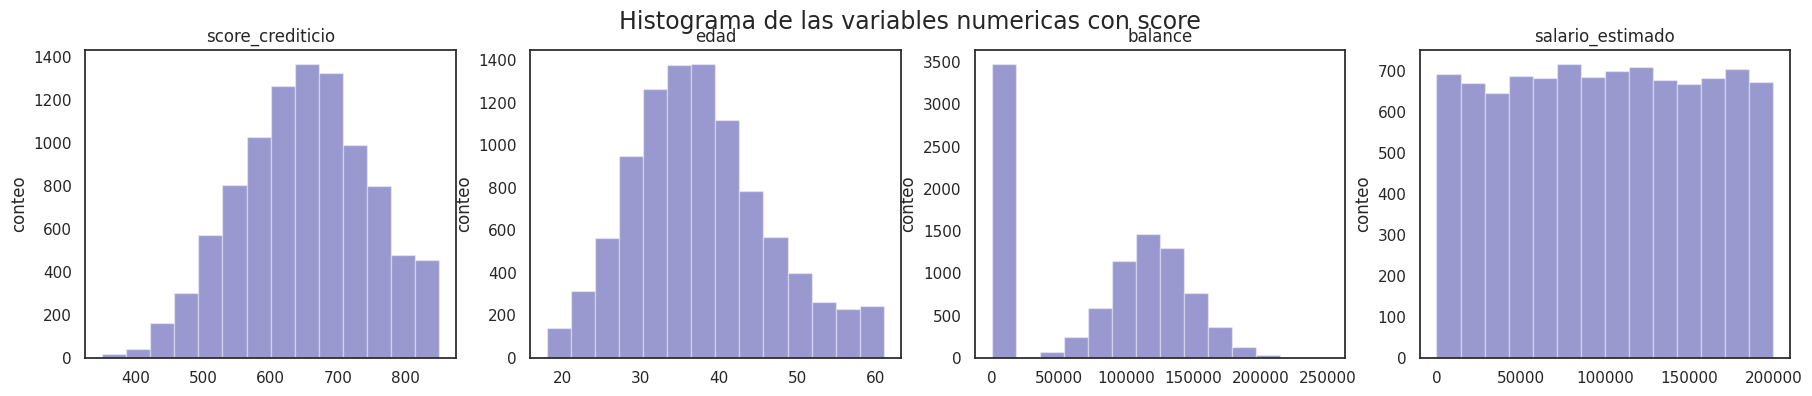

In [ ]:
sns.set(style='white')
fig, axes = plt.subplots(1,4, figsize=(22, 4))
lista = list(df_score.columns)

for n in range(0,4):
    key = lista[n]
    histograma(df_score, key, n)

fig.suptitle('Histograma de las variables numericas con score', fontsize=17)

Observaciones:

1) La variable score_crediticio y edad parecieran tener un pequeño sesgo hacia un lado.

2) La variable balance por la cantidad de ceros tiene un comportamiento raro.

3) La variable salario_estimado podria aproximarce a una distribucion uniforme.

Asimetría y Kurtosis

In [ ]:
# Definimos función para calcular asimetria y curtosis
def tabla_frecuencia(dataframe, column):
  columna = dataframe[column]
  print(f'Curtosis: {kurtosis(columna)}')
  print(f'Asimetría: {skew(columna)}')

In [ ]:
#Generamos valores de asimetria y kurtosis

lista = list(df_score.columns)

for n in range(0,4):
    key = lista[n]
    print(f'Para la variable {key} tenemos:')
    tabla_frecuencia(df_score, key)
    print(f'\n')

Para la variable score_crediticio tenemos:
Curtosis: -0.42317342618926945
Asimetría: -0.07273087944095606


Para la variable edad tenemos:
Curtosis: -0.06734106963226827
Asimetría: 0.4471454867814395


Para la variable balance tenemos:
Curtosis: -1.4861419535065685
Asimetría: -0.1408785405353179


Para la variable salario_estimado tenemos:
Curtosis: -1.1802356498623188
Asimetría: -0.002565778270256815




Observaciones:

1) Para la variable score_crediticio vemos que podria considerarce casi simetrica y que tiene poca dispercion de los datos.

2) Para la variable edad tenemos una leve asimetria positiva. Con una dispercion casi normal.

3) Para la variable balance tenemos una asimetria negativa debido a la cantidad de ceros y por lo mismo una poco dispercion de los datos.

4) Para la variable salario_estimado tenemos una buena simetria y muy poca dispercion de los datos.

Gráficas de densidad

In [ ]:
valores_abandono = {
    0 : 'vigente',
    1 : 'abandono'
}

df_score['abandono'].replace(valores_abandono, inplace=True)
df_score

score_crediticio  edad    balance  salario_estimado  abandono
0                  619    42       0.00         101348.88  abandono
1                  608    41   83807.86         112542.58   vigente
2                  502    42  159660.80         113931.57  abandono
3                  699    39       0.00          93826.63   vigente
4                  850    43  125510.82          79084.10   vigente
...                ...   ...        ...               ...       ...
9995               771    39       0.00          96270.64   vigente
9996               516    35   57369.61         101699.77   vigente
9997               709    36       0.00          42085.58  abandono
9998               772    42   75075.31          92888.52  abandono
9999               792    28  130142.79          38190.78   vigente

[9589 rows x 5 columns]

In [ ]:
#Generamos subconjuntos por cada categoría de 'Abandono'
df_filtrado_abandono = df_score.loc[df_score['abandono'] == 'abandono']
df_filtrado_abandono

score_crediticio  edad    balance  salario_estimado  abandono
0                  619    42       0.00         101348.88  abandono
2                  502    42  159660.80         113931.57  abandono
5                  645    44  113755.78         149756.71  abandono
7                  376    29  115046.74         119346.88  abandono
16                 653    58  132602.88           5097.67  abandono
...                ...   ...        ...               ...       ...
9981               498    42  152039.70          53445.17  abandono
9982               655    46  137145.12         115146.40  abandono
9991               597    53   88381.21          69384.71  abandono
9997               709    36       0.00          42085.58  abandono
9998               772    42   75075.31          92888.52  abandono

[1943 rows x 5 columns]

In [ ]:
df_filtrado_vigente = df_score.loc[df_score['abandono'] == 'vigente']
df_filtrado_vigente

score_crediticio  edad    balance  salario_estimado abandono
1                  608    41   83807.86         112542.58  vigente
3                  699    39       0.00          93826.63  vigente
4                  850    43  125510.82          79084.10  vigente
6                  822    50       0.00          10062.80  vigente
8                  501    44  142051.07          74940.50  vigente
...                ...   ...        ...               ...      ...
9993               644    28  155060.41          29179.52  vigente
9994               800    29       0.00         167773.55  vigente
9995               771    39       0.00          96270.64  vigente
9996               516    35   57369.61         101699.77  vigente
9999               792    28  130142.79          38190.78  vigente

[7646 rows x 5 columns]

In [ ]:
# Definimos función para generar gráficas de densidad
def graficas(dataframe_1, dataframe_2, column, i):
    sns.distplot(dataframe_1[column], hist = False, kde_kws = {'shade': True}, ax=axes[i], label='abandono')
    sns.distplot(dataframe_2[column], hist = False, kde_kws = {'shade': True}, ax=axes[i], label= 'vigente')
    axes[i].set(xlabel= column, ylabel='densidad de probabilidad');
    axes[i].legend(loc='upper right');

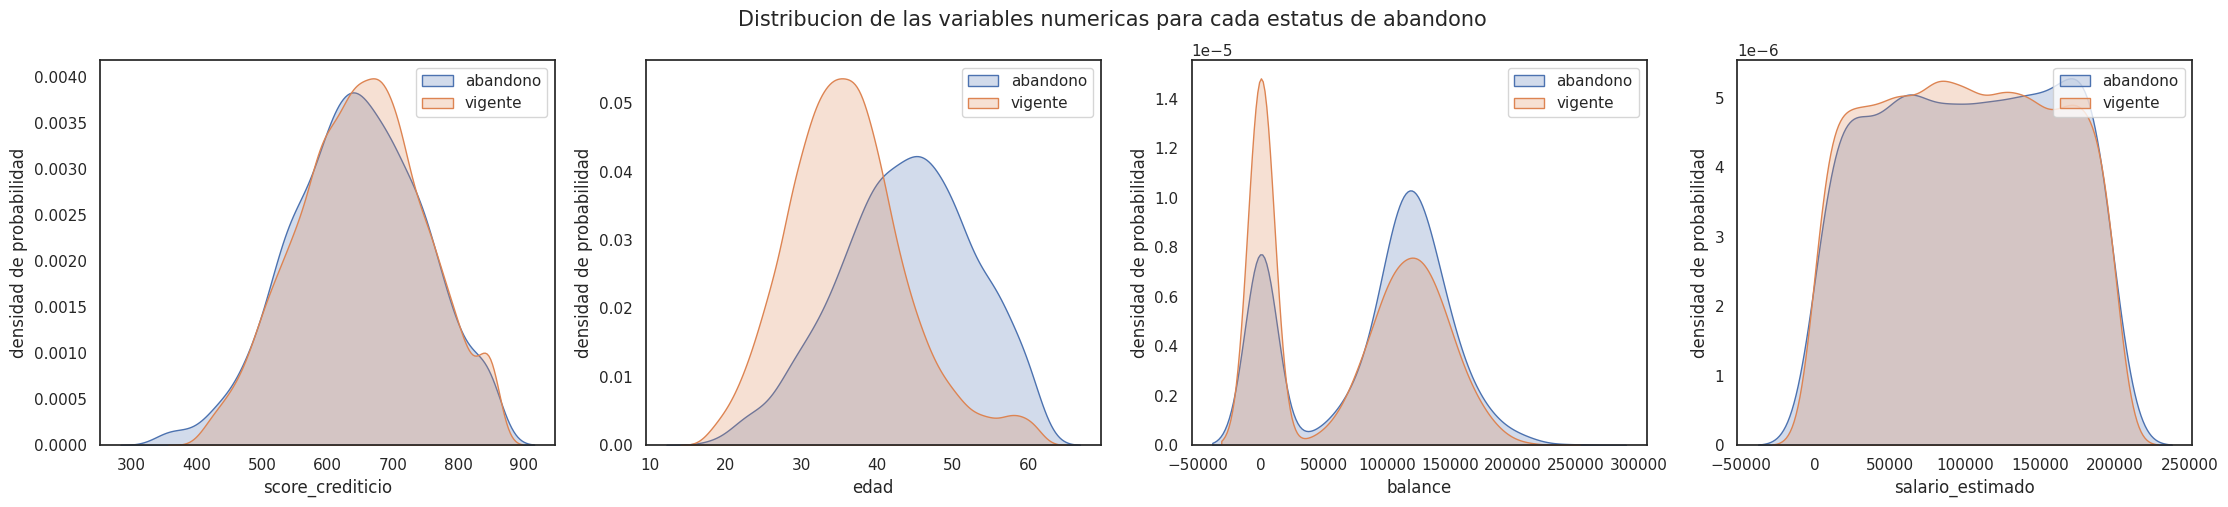

In [ ]:
sns.set(style='white')
fig, axes = plt.subplots(1,4, figsize=(27, 5))
lista = list(df_score.columns)

for n in range(0,4):
    key = lista[n]
    graficas(df_filtrado_abandono, df_filtrado_vigente, key, n)

fig.suptitle('Distribucion de las variables numericas para cada estatus de abandono', fontsize=15);

Observaciones:

1) En la variable Edad podemos notar apartir de los 40 años la distribucion de abandono es mas grande que la de vigente.

Gráficas de barras

In [ ]:
df_score_filtered = df_filtered[filtro_superior & filtro_inferior]
df_score_filtered

score_crediticio pais_residencia  genero  edad  antigüedad_cliente  \
0                  619          France  Female    42                   2   
1                  608           Spain  Female    41                   1   
2                  502          France  Female    42                   8   
3                  699          France  Female    39                   1   
4                  850           Spain  Female    43                   2   
...                ...             ...     ...   ...                 ...   
9995               771          France    Male    39                   5   
9996               516          France    Male    35                  10   
9997               709          France  Female    36                   7   
9998               772         Germany    Male    42                   3   
9999               792          France  Female    28                   4   

        balance  numero_productos  tieneTC  miembro_activo  salario_estimado  \
0          0.00                 1        1               1         101348.88   
1      83807.86                 1        0               1         112542.58   
2     159660.80                 3        1               0         113931.57   
3          0.00                 2        0               0          93826.63   
4     125510.82                 1        1               1          79084.10   
...         ...               ...      ...             ...               ...   
9995       0.00                 2        1               0          96270.64   
9996   57369.61                 1        1               1         101699.77   
9997       0.00                 1        0               1          42085.58   
9998   75075.31                 2        1               0          92888.52   
9999  130142.79                 1        1               0          38190.78   

      abandono  
0            1  
1            0  
2            1  
3            0  
4            0  
...        ...  
9995         0  
9996         0  
9997         1  
9998         1  
9999         0  

[9589 rows x 11 columns]

In [ ]:
#Reemplazamos valores por etiquetas

df_score_filtered["tieneTC"]=df_score_filtered["tieneTC"].replace({0:"No",1:"Si"})
df_score_filtered["miembro_activo"]=df_score_filtered["miembro_activo"].replace({0:"no",1:"si"})
df_score_filtered["abandono"]=df_score_filtered["abandono"].replace({0:"vigente",1:"abandono"})

In [ ]:
# Eliminamos las columanas que no necesitamos
df_variables_categoricas=df_score_filtered.drop(columns=['score_crediticio','edad','balance','salario_estimado'])
df_variables_categoricas

pais_residencia  genero  antigüedad_cliente  numero_productos tieneTC  \
0             France  Female                   2                 1      Si   
1              Spain  Female                   1                 1      No   
2             France  Female                   8                 3      Si   
3             France  Female                   1                 2      No   
4              Spain  Female                   2                 1      Si   
...              ...     ...                 ...               ...     ...   
9995          France    Male                   5                 2      Si   
9996          France    Male                  10                 1      Si   
9997          France  Female                   7                 1      No   
9998         Germany    Male                   3                 2      Si   
9999          France  Female                   4                 1      Si   

     miembro_activo  abandono  
0                si  abandono  
1                si   vigente  
2                no  abandono  
3                no   vigente  
4                si   vigente  
...             ...       ...  
9995             no   vigente  
9996             si   vigente  
9997             si  abandono  
9998             no  abandono  
9999             no   vigente  

[9589 rows x 7 columns]

In [ ]:
#Definimos función para generar gráficas de barras

def grafica_barras(dataframe, columna, i, j):
  counts = dataframe[columna].value_counts()
  porcentajes = counts * 100 / counts.sum()
  sns.barplot(x=porcentajes.index, y=porcentajes, ax=axes[i,j],palette="mako")
  axes[i,j].set(xlabel='', ylabel='Porcentaje de frecuencia', title= columna)
  if i == 0 and j==0:
      axes[i,j].set_xticklabels(labels=porcentajes.index,rotation=0)
  else:
     axes[i,j].set_xticklabels(labels=porcentajes.index,rotation="vertical");

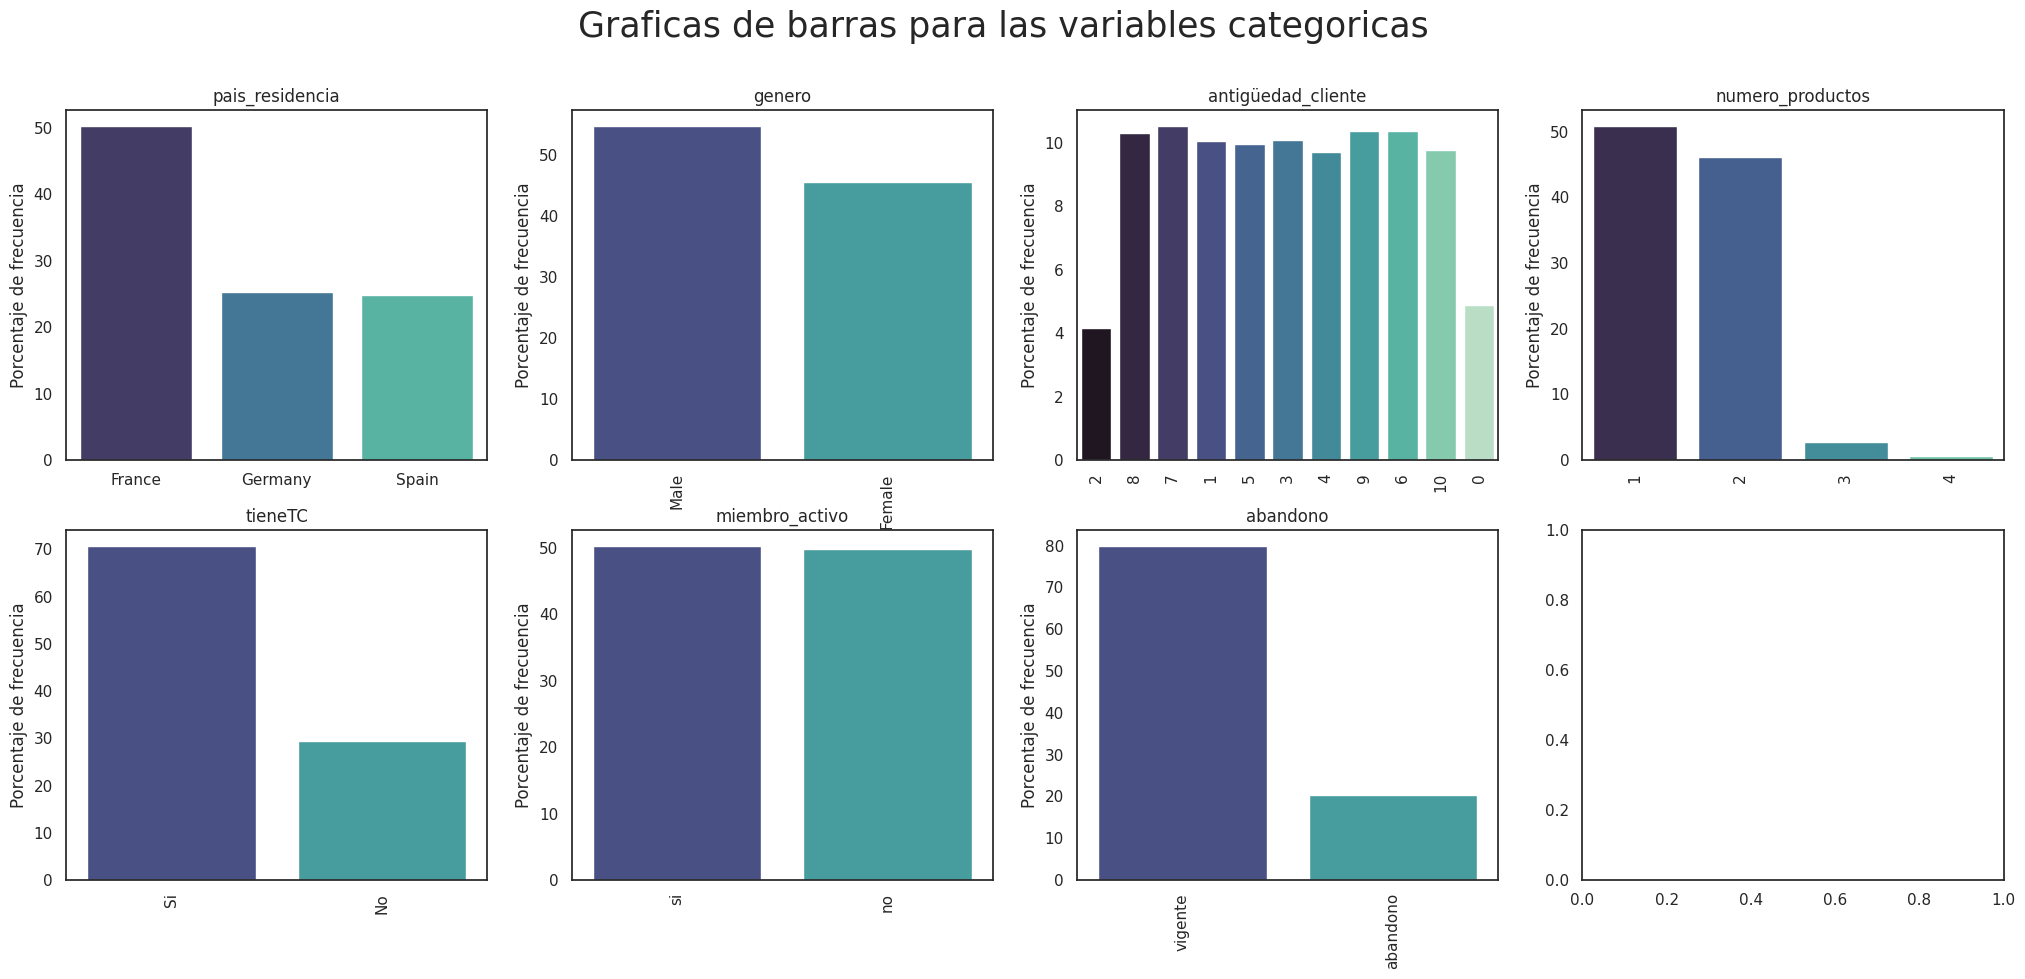

In [ ]:
#Generamos gráficas
sns.set(style='white')
fig, axes = plt.subplots(2, 4, figsize=(25, 10))
lista = list(df_variables_categoricas.columns)
i= [0,0,0,0,1,1,1,1]
j= [0,1,2,3,0,1,2,3]
for n in range(0,7):
    key = lista[n]
    a = i[n]
    b = j[n]
    grafica_barras(df_variables_categoricas, key, a, b)

fig.suptitle('Graficas de barras para las variables categoricas', fontsize=25);

Tablas de contingencia

In [ ]:
crosstab = pd.crosstab(df_variables_categoricas['abandono'], df_variables_categoricas['numero_productos'],normalize="index")
crosstab

numero_productos         1         2         3         4
abandono                                                
abandono          0.694287  0.168296  0.107051  0.030365
vigente           0.459979  0.534528  0.005493  0.000000

In [ ]:
crosstab2 = pd.crosstab(df_variables_categoricas['abandono'], [df_variables_categoricas['numero_productos'],df_variables_categoricas["tieneTC"]],normalize='index')
crosstab2

numero_productos         1                   2                   3            \
tieneTC                 No        Si        No        Si        No        Si   
abandono                                                                       
abandono          0.204323  0.489964  0.056099  0.112198  0.029851  0.077200   
vigente           0.135888  0.324091  0.155245  0.379283  0.001569  0.003924   

numero_productos         4            
tieneTC                 No        Si  
abandono                              
abandono          0.009779  0.020587  
vigente           0.000000  0.000000

In [ ]:
#Definimos función para graficar
def tabla_conti(dataframe, columna_1, columna_2):
  crosstab = pd.crosstab(dataframe[columna_1], dataframe[columna_2],normalize="index")
  lista_indice = crosstab.index
  fig, axes = plt.subplots(1,2, figsize=(10, 4), sharex=True, sharey=True)
  for i in range(0,2):
    sns.barplot(x= crosstab.columns, y= crosstab.loc[lista_indice[i]], ax=axes[i],palette="mako")
    axes[i].set(xlabel='', ylabel='Porcentaje de frecuencias', title= lista_indice[i])
    axes[i].set_xticklabels(labels=crosstab.columns,rotation="vertical")
    fig.suptitle(f'Conteo de tipo de {columna_2} para diferente estado de Abandono', fontsize=10);

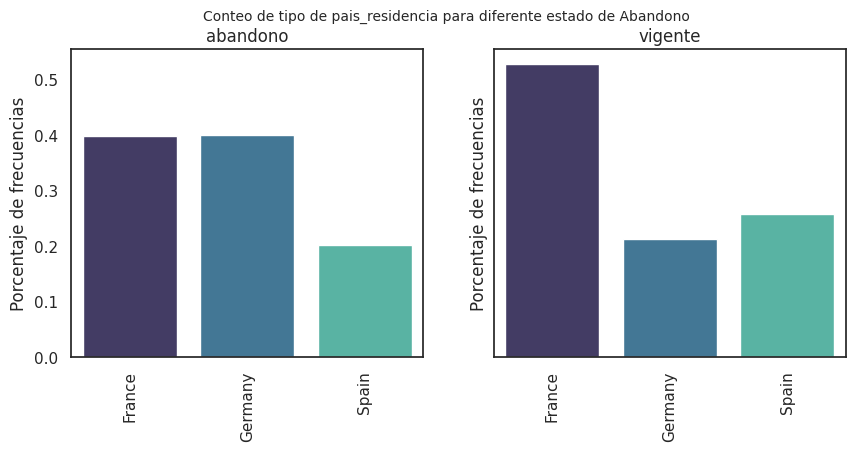

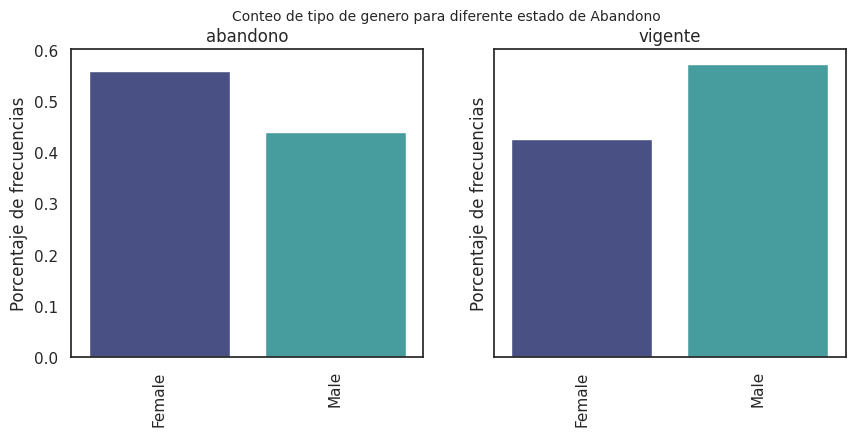

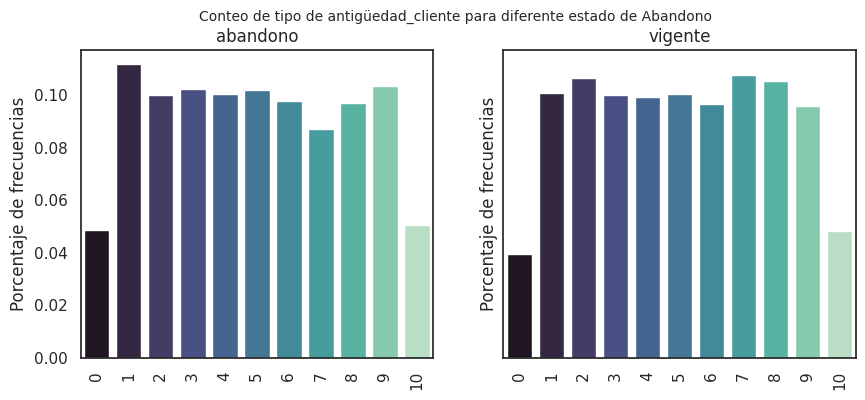

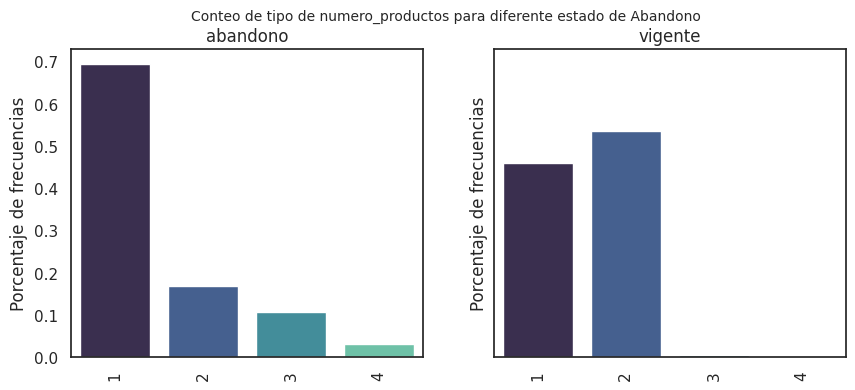

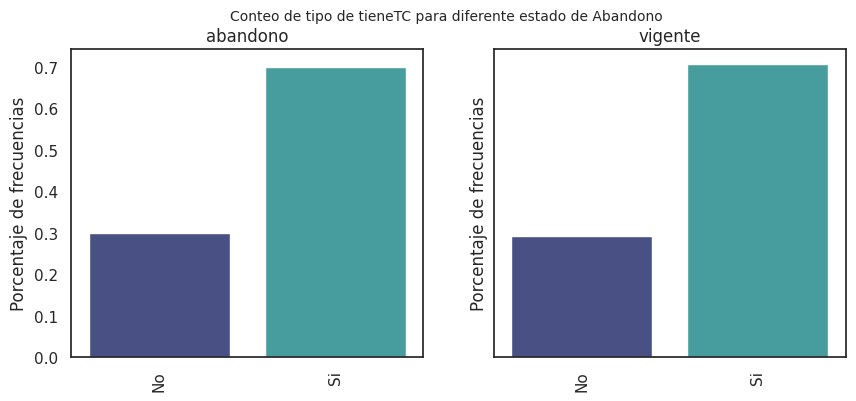

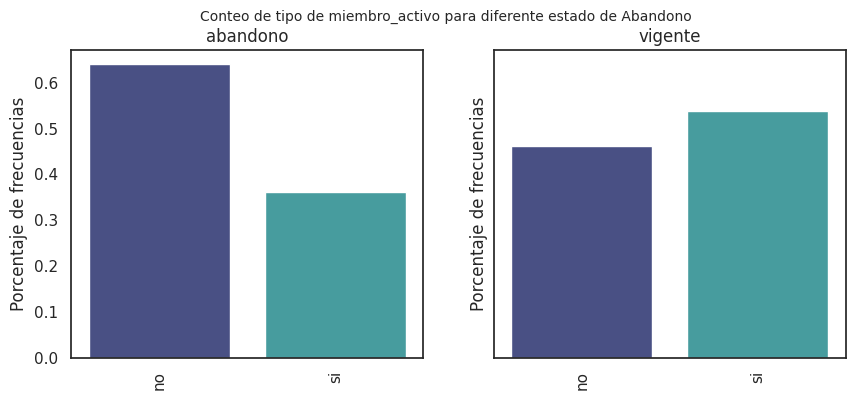

In [ ]:
lista_var = list(df_variables_categoricas.columns)
for n in range(0,6):
    key = lista[n]
    tabla_conti(df_variables_categoricas, 'abandono', key)

Boxplots y violinplots (relación entre categóricas y numéricas

In [ ]:
#Definimos función para generar gráficas
def boxplot_var_cate(dataframe, columna_1, columna_2 , i, j):
  sns.boxplot(data=dataframe, x=columna_1, y=columna_2, ax=axes[i,j],palette="crest");
  axes[i,j].set(xlabel='', ylabel=columna_2, title= columna_1)

In [ ]:
df_filtered

score_crediticio pais_residencia  genero  edad  antigüedad_cliente  \
0                  619          France  Female    42                   2   
1                  608           Spain  Female    41                   1   
2                  502          France  Female    42                   8   
3                  699          France  Female    39                   1   
4                  850           Spain  Female    43                   2   
...                ...             ...     ...   ...                 ...   
9995               771          France    Male    39                   5   
9996               516          France    Male    35                  10   
9997               709          France  Female    36                   7   
9998               772         Germany    Male    42                   3   
9999               792          France  Female    28                   4   

        balance  numero_productos  tieneTC  miembro_activo  salario_estimado  \
0          0.00                 1        1               1         101348.88   
1      83807.86                 1        0               1         112542.58   
2     159660.80                 3        1               0         113931.57   
3          0.00                 2        0               0          93826.63   
4     125510.82                 1        1               1          79084.10   
...         ...               ...      ...             ...               ...   
9995       0.00                 2        1               0          96270.64   
9996   57369.61                 1        1               1         101699.77   
9997       0.00                 1        0               1          42085.58   
9998   75075.31                 2        1               0          92888.52   
9999  130142.79                 1        1               0          38190.78   

      abandono  
0            1  
1            0  
2            1  
3            0  
4            0  
...        ...  
9995         0  
9996         0  
9997         1  
9998         1  
9999         0  

[10000 rows x 11 columns]

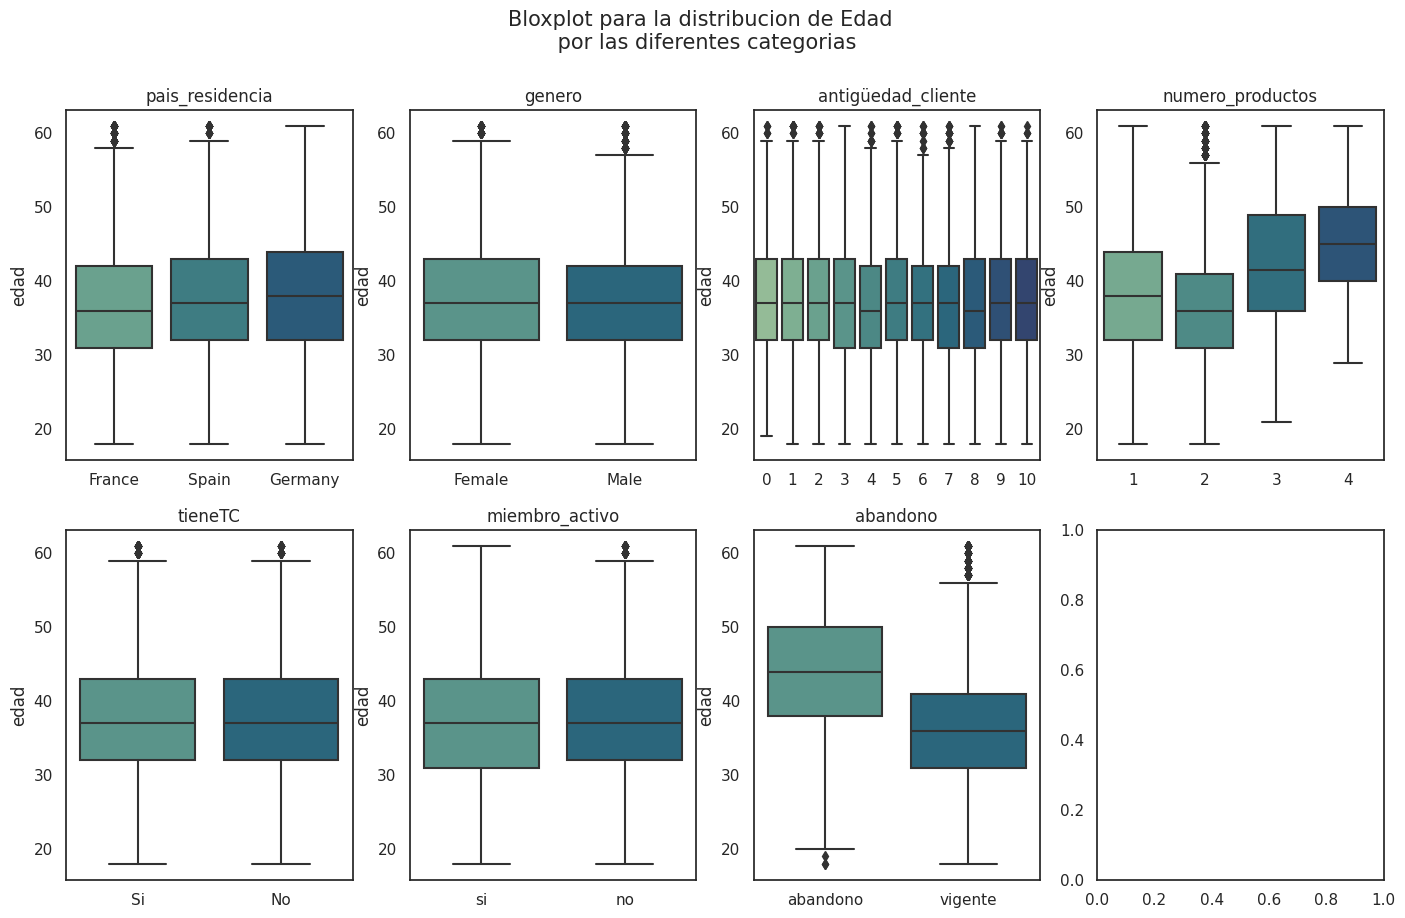

In [ ]:
#Generamos gráficas
sns.set(style='white')
fig, axes = plt.subplots(2, 4, figsize=(17, 10))
lista = list(df_score_filtered.columns)
i= [0,0,0,0,1,1,1,1]
j= [0,1,2,3,0,1,2,3]
lista_1 = [1,2,4,6,7,8,10]
for n in range(0,7):
    m = lista_1[n]
    key = lista[m]
    a = i[n]
    b = j[n]
    boxplot_var_cate(df_score_filtered, key, 'edad', a, b)

fig.suptitle('Bloxplot para la distribucion de Edad \n por las diferentes categorias', fontsize=15);

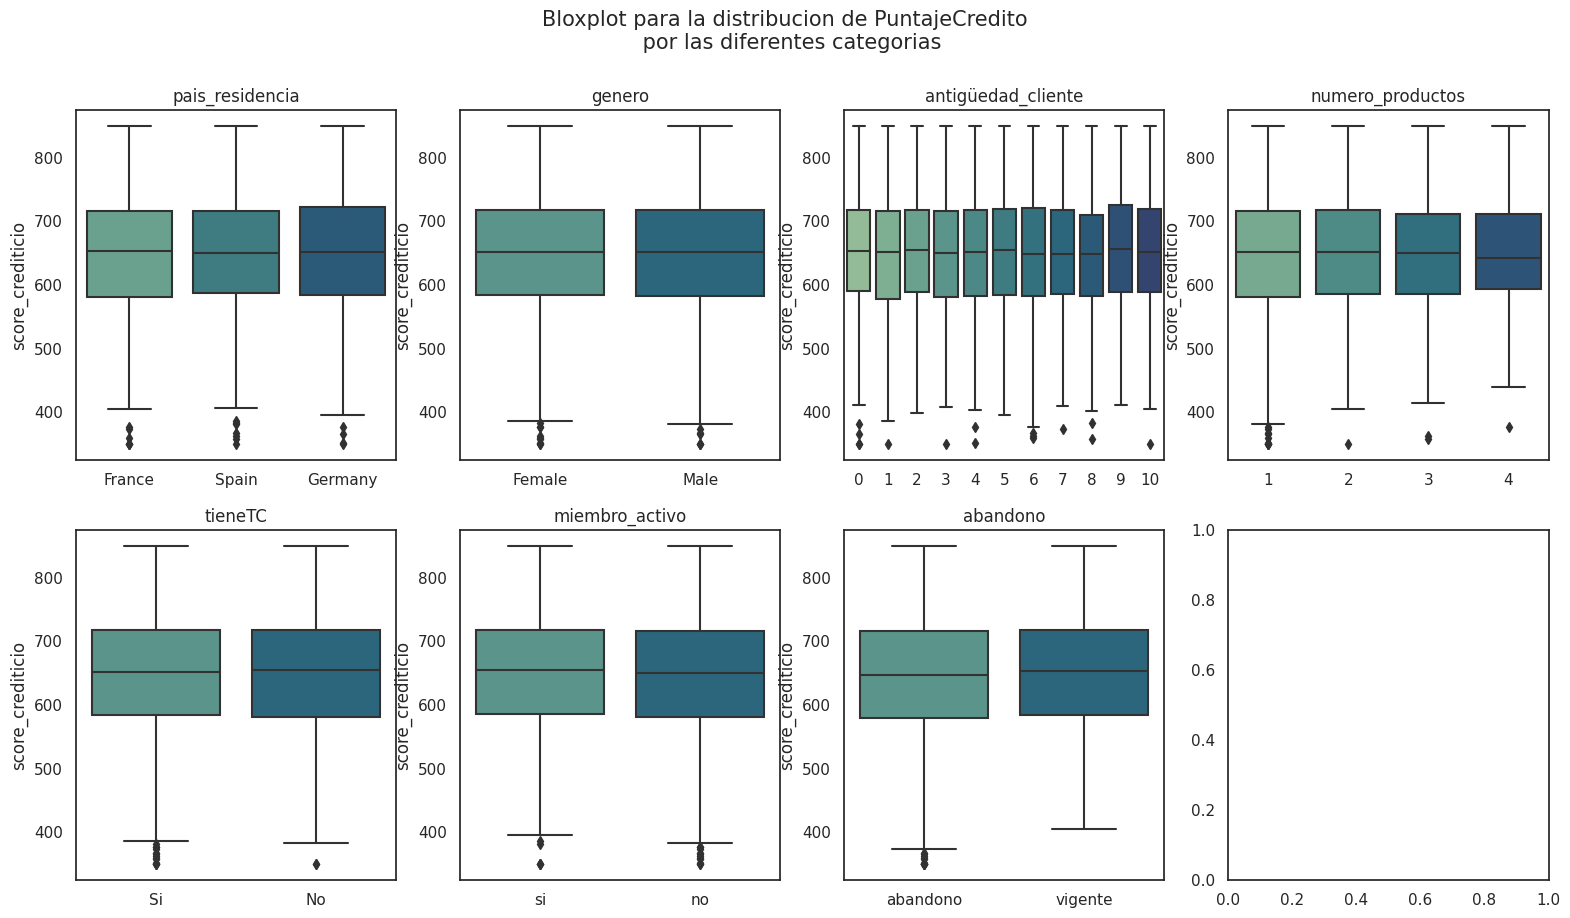

In [ ]:
sns.set(style='white')
fig, axes = plt.subplots(2, 4, figsize=(19, 10))
lista = list(df_score_filtered.columns)
i= [0,0,0,0,1,1,1,1]
j= [0,1,2,3,0,1,2,3]
lista_1 = [1,2,4,6,7,8,10]
for n in range(0,7):
    m = lista_1[n]
    key = lista[m]
    a = i[n]
    b = j[n]
    boxplot_var_cate(df_score_filtered, key, 'score_crediticio', a, b)

fig.suptitle('Bloxplot para la distribucion de PuntajeCredito \n por las diferentes categorias', fontsize=15);

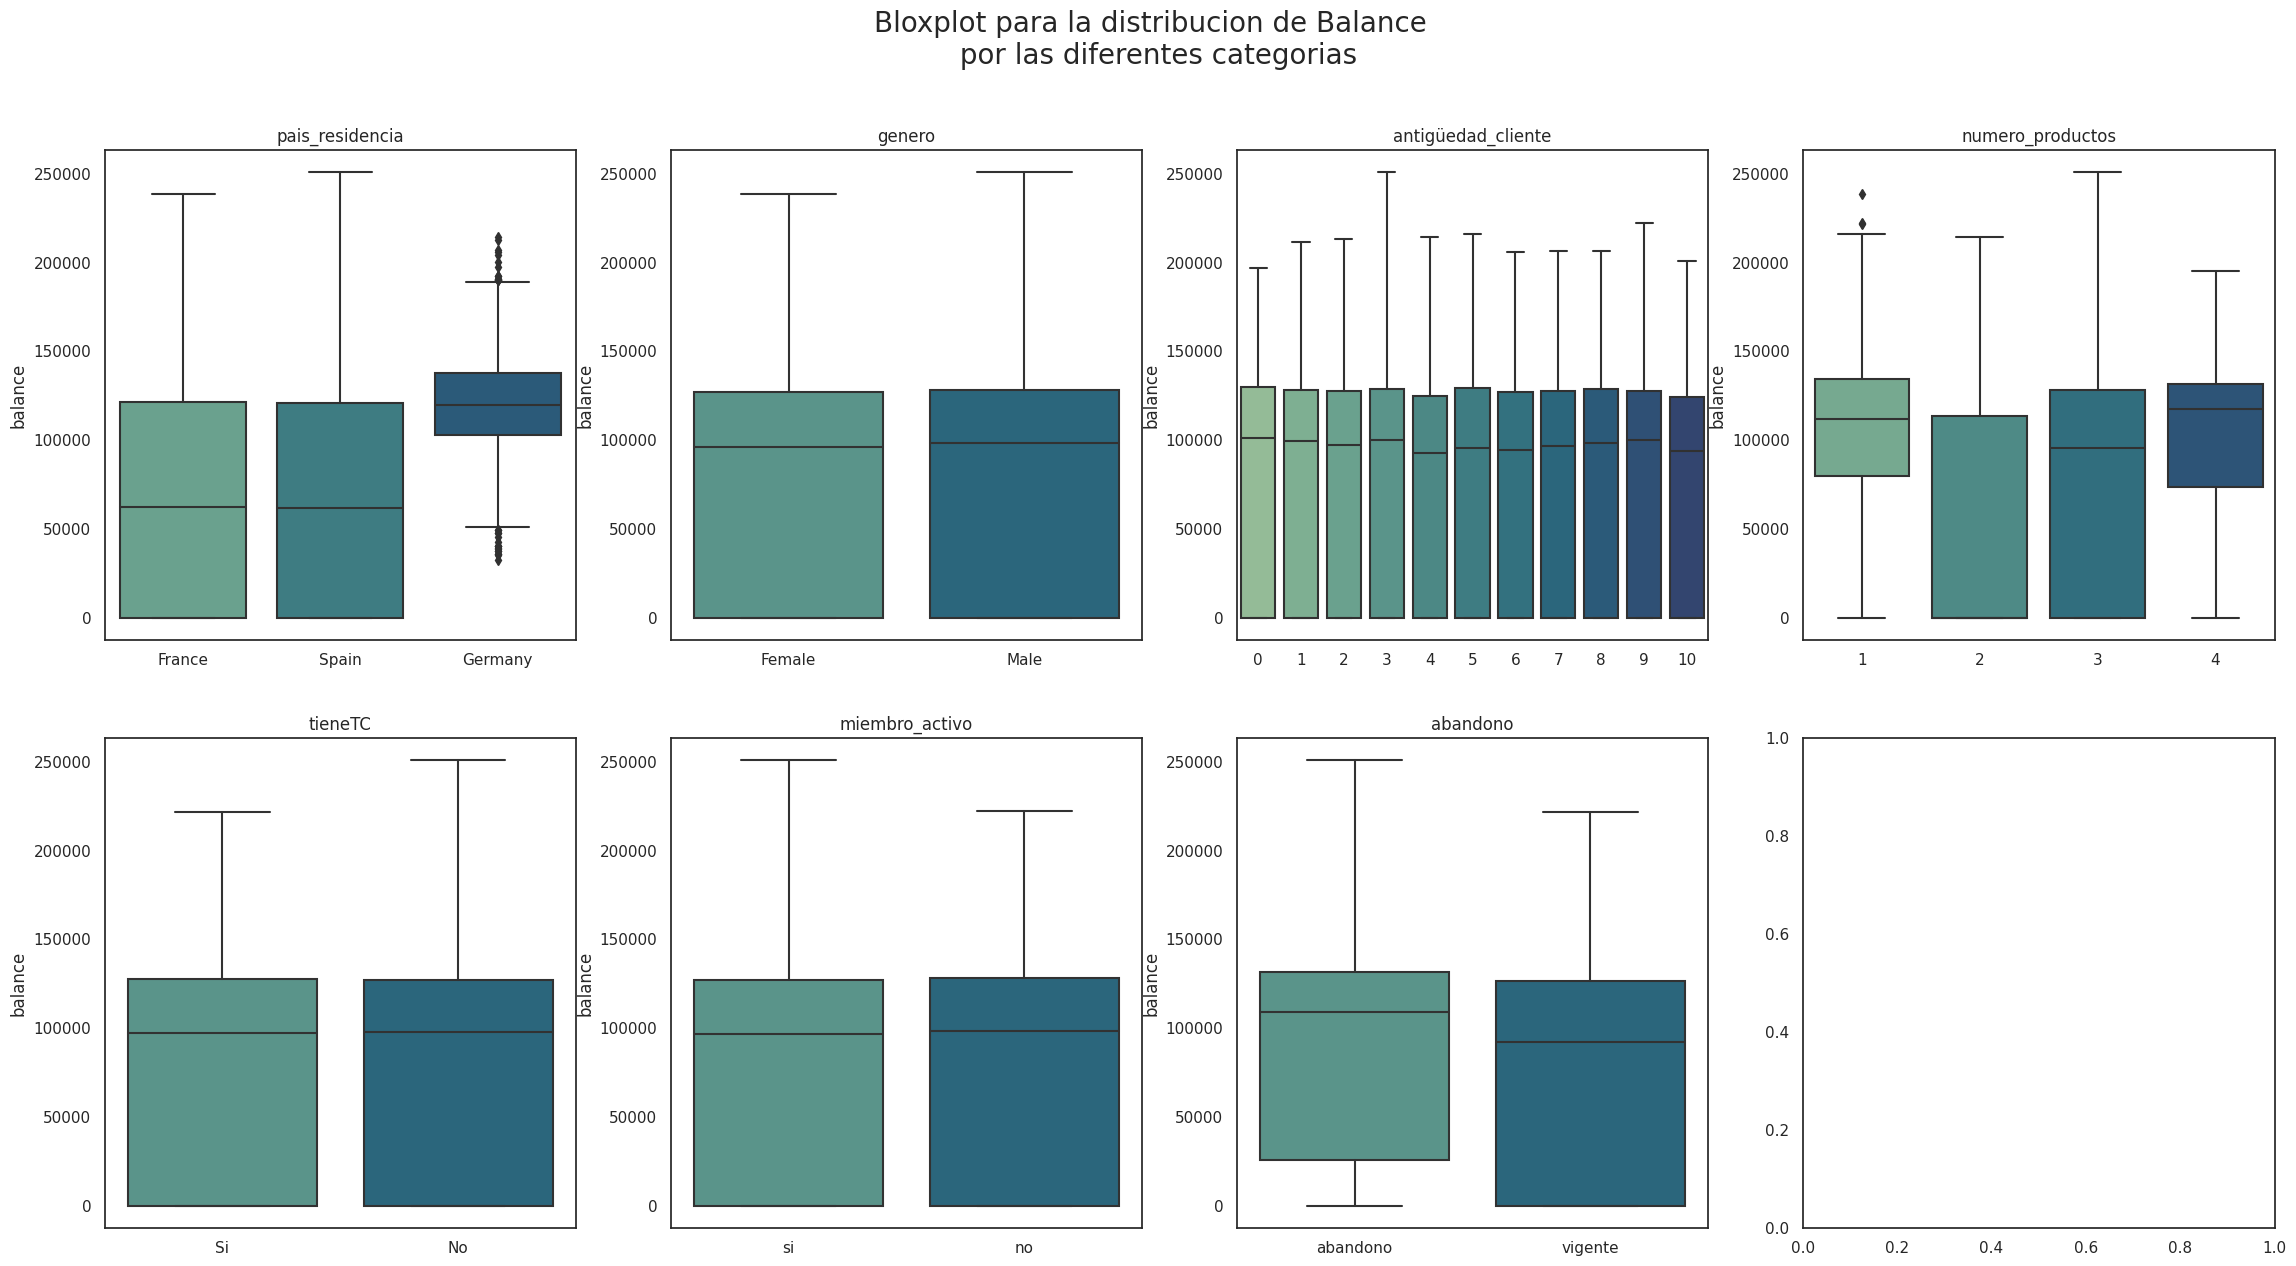

In [ ]:
sns.set(style='white')
fig, axes = plt.subplots(2, 4, figsize=(28, 14))
lista = list(df_score_filtered.columns)
i= [0,0,0,0,1,1,1,1]
j= [0,1,2,3,0,1,2,3]
lista_1 = [1,2,4,6,7,8,10]
for n in range(0,7):
    m = lista_1[n]
    key = lista[m]
    a = i[n]
    b = j[n]
    boxplot_var_cate(df_score_filtered, key, 'balance', a, b)

fig.suptitle('Bloxplot para la distribucion de Balance \n por las diferentes categorias', fontsize=20);

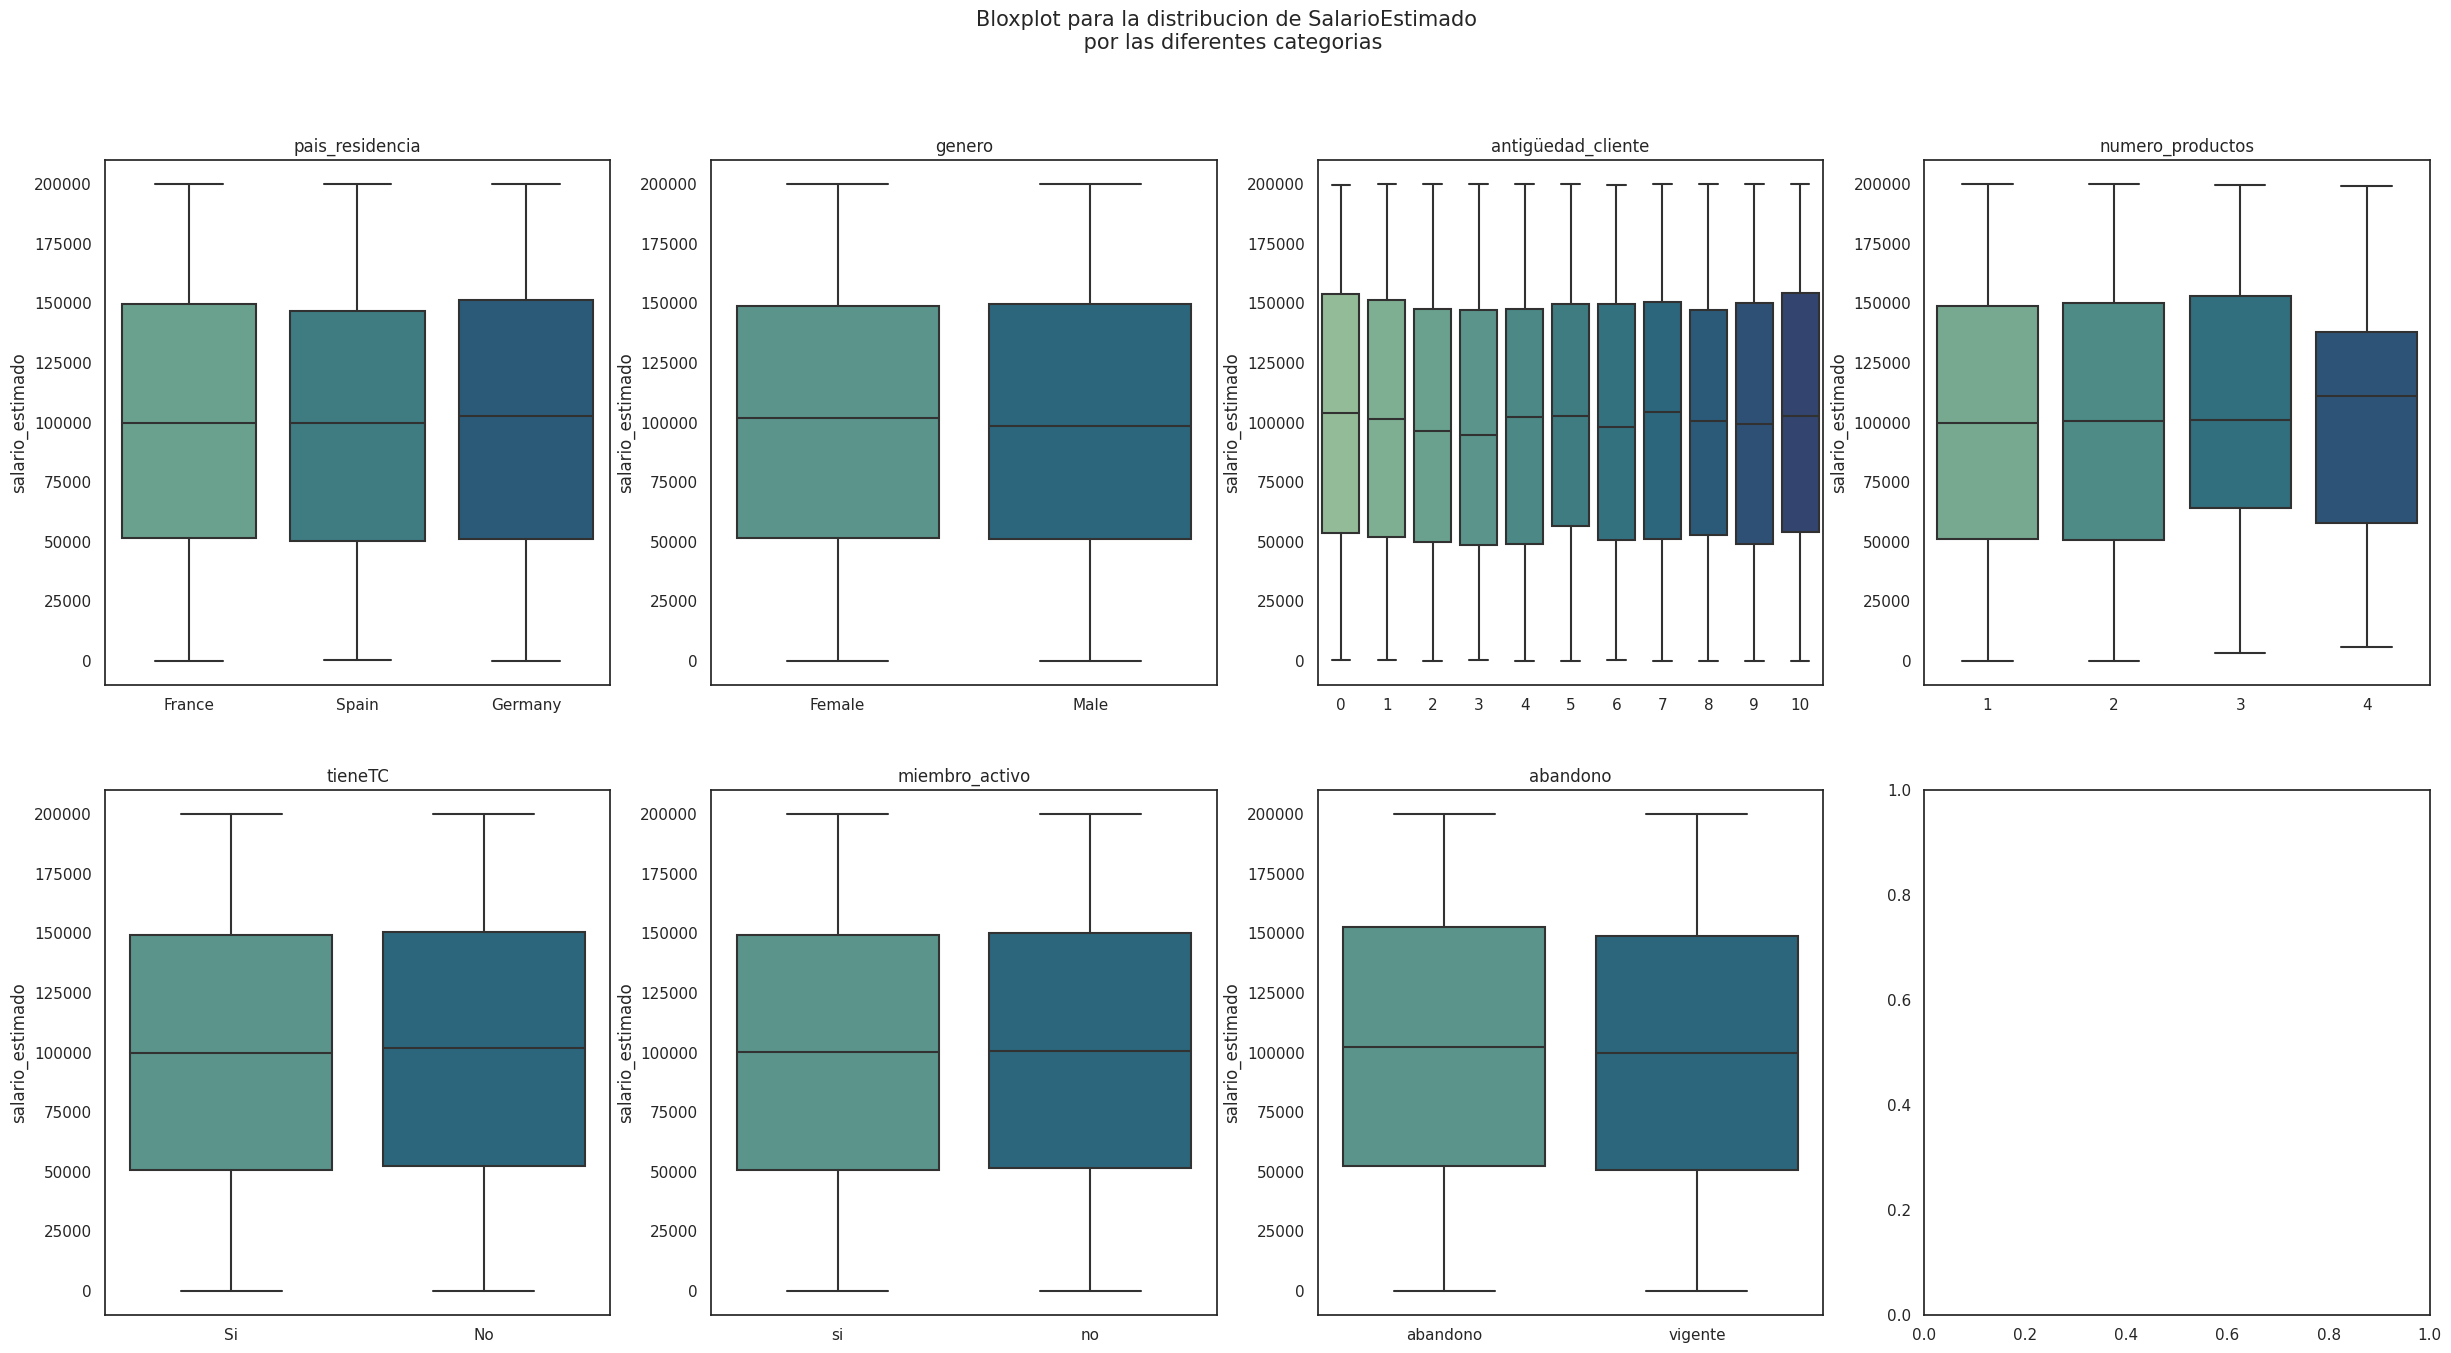

In [ ]:
sns.set(style='white')
fig, axes = plt.subplots(2, 4, figsize=(30, 15))
lista = list(df_score_filtered.columns)
i= [0,0,0,0,1,1,1,1]
j= [0,1,2,3,0,1,2,3]
lista_1 = [1,2,4,6,7,8,10]
for n in range(0,7):
    m = lista_1[n]
    key = lista[m]
    a = i[n]
    b = j[n]
    boxplot_var_cate(df_score_filtered, key, 'salario_estimado', a, b)

fig.suptitle('Bloxplot para la distribucion de SalarioEstimado \n por las diferentes categorias', fontsize=15);

In [ ]:
def violinplot_var_cate(dataframe, columna_1, columna_2 , i, j):
  sns.violinplot(data=dataframe, x=columna_1, y=columna_2, ax=axes[i,j],palette="crest");
  axes[i,j].set(xlabel='', ylabel=columna_2, title= columna_1);

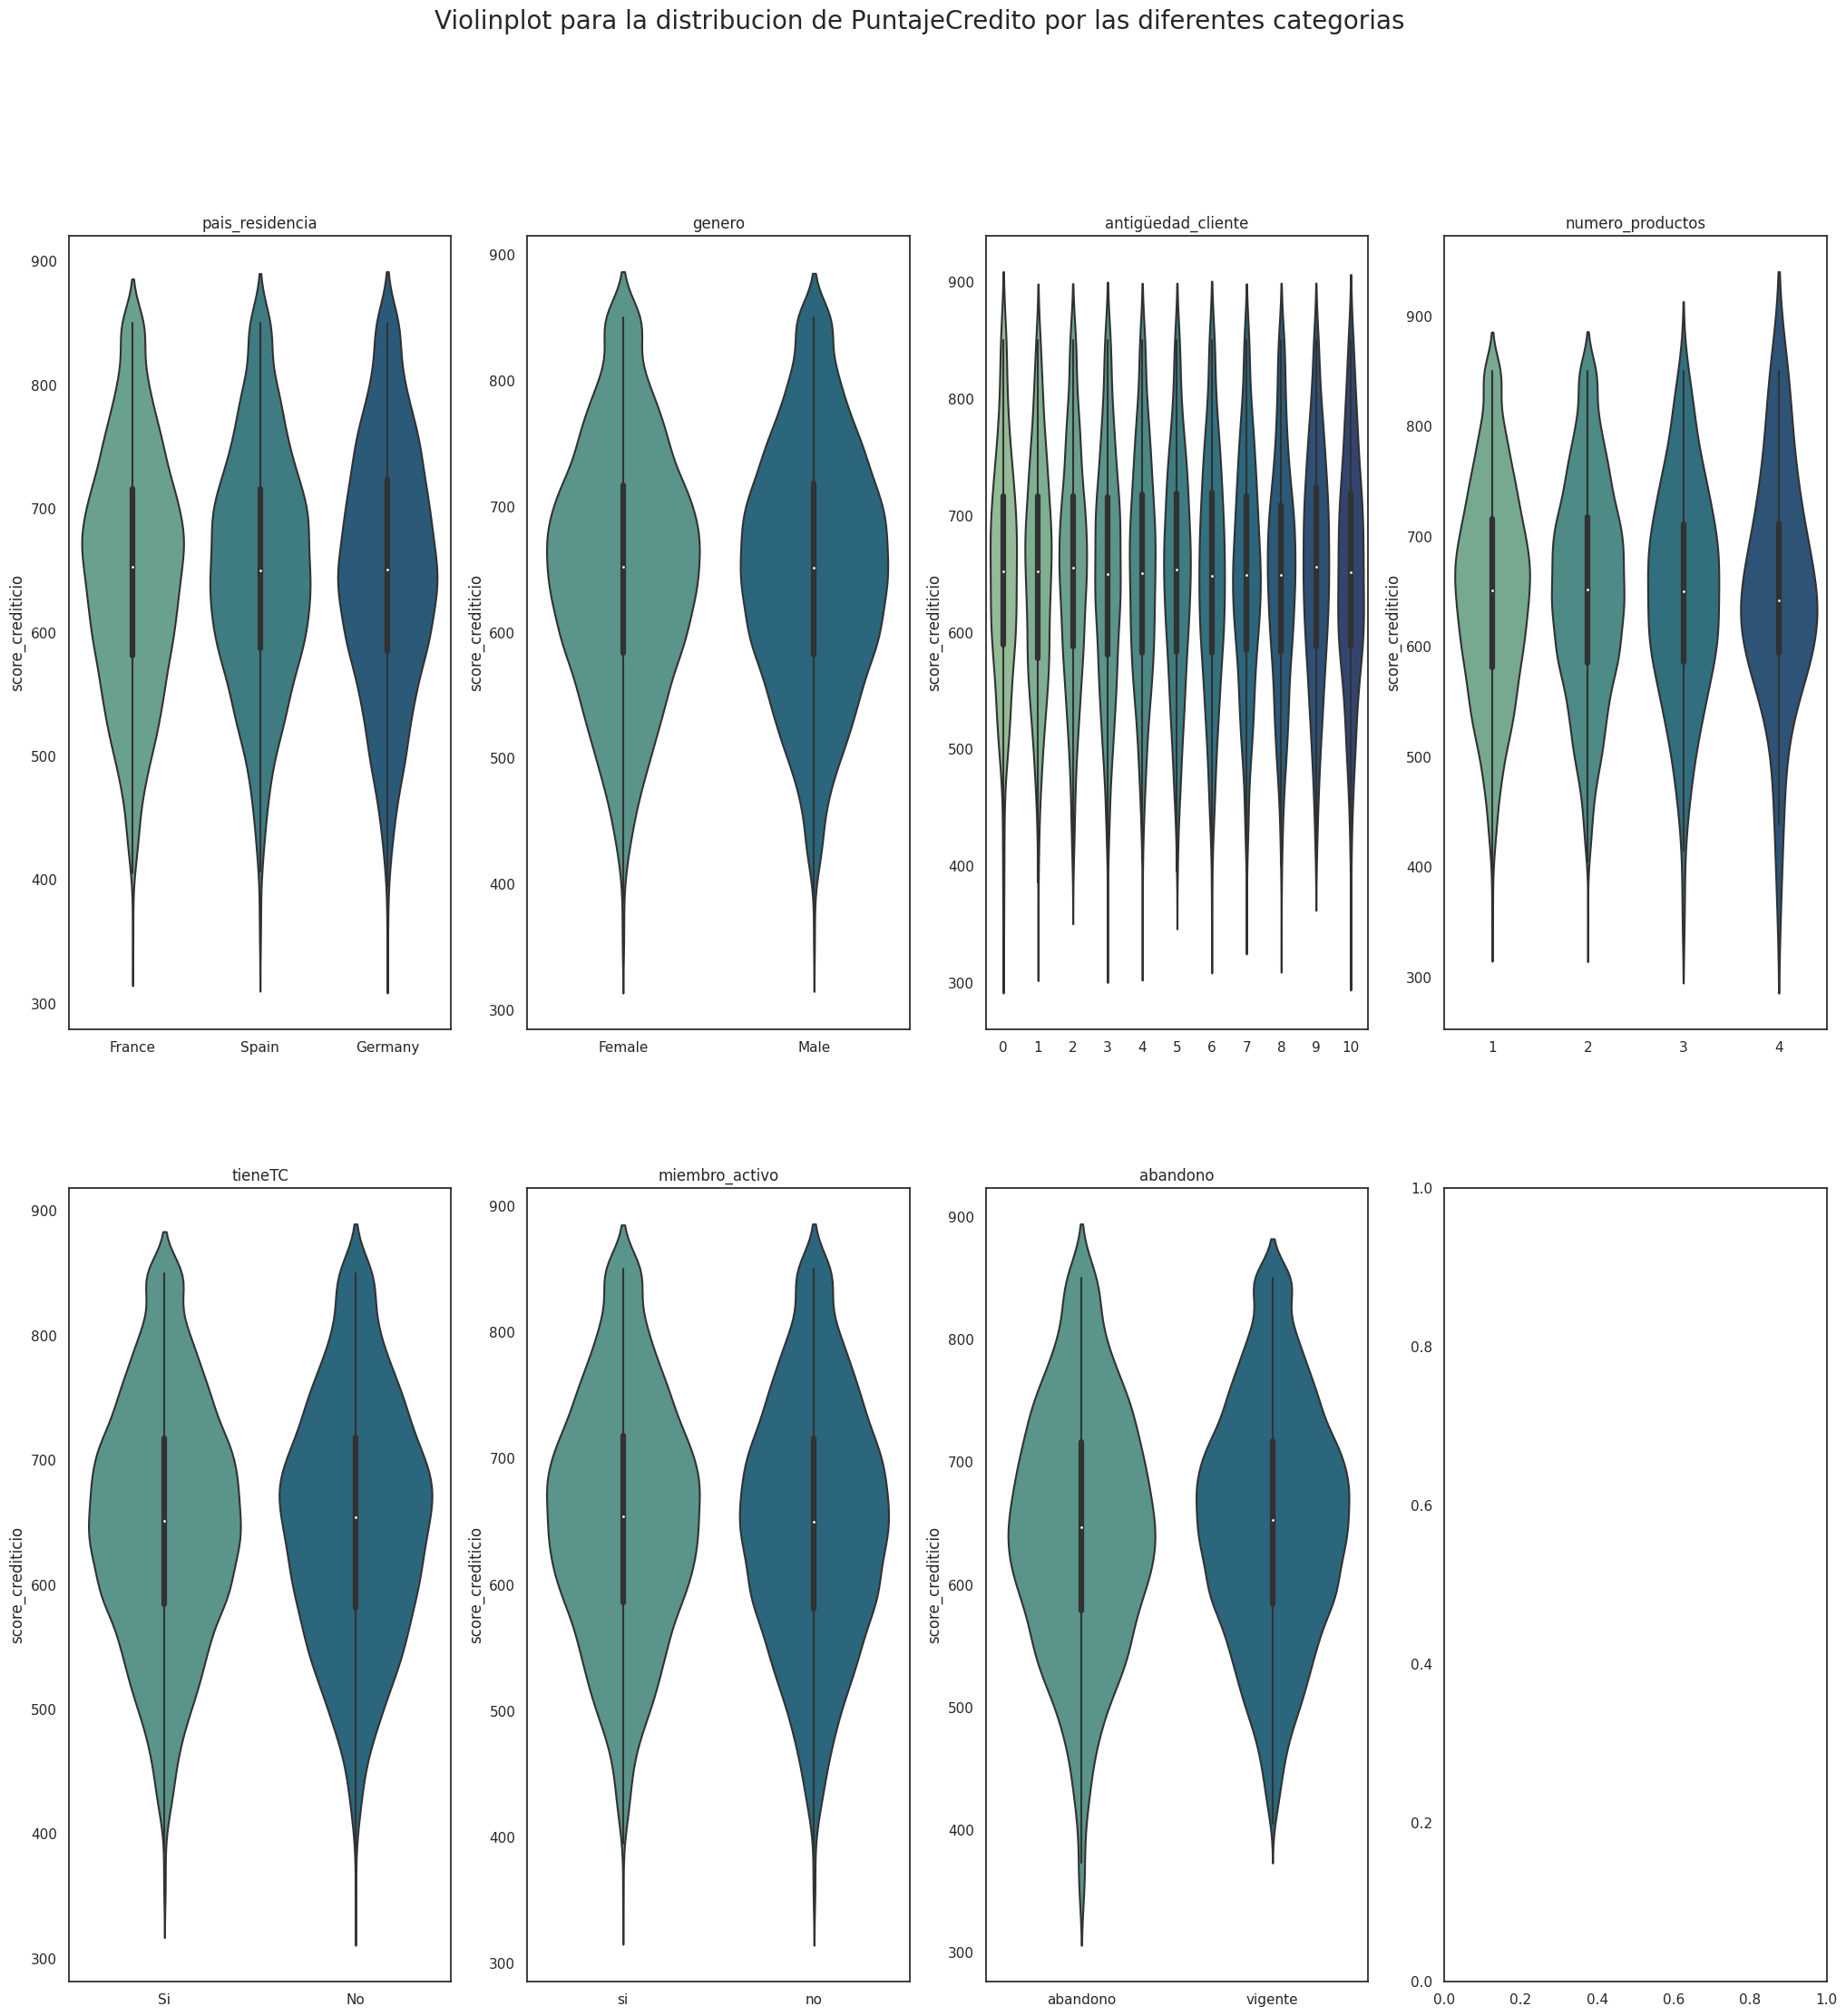

In [ ]:
sns.set(style='white')
fig, axes = plt.subplots(2, 4, figsize=(25, 25))
lista = list(df_score_filtered.columns)
i= [0,0,0,0,1,1,1,1]
j= [0,1,2,3,0,1,2,3]
lista_1 =[1,2,4,6,7,8,10]
for n in range(0,7):
    m = lista_1[n]
    key = lista[m]
    a = i[n]
    b = j[n]
    violinplot_var_cate(df_score_filtered, key, 'score_crediticio', a, b)

fig.suptitle('Violinplot para la distribucion de PuntajeCredito por las diferentes categorias', fontsize=20);

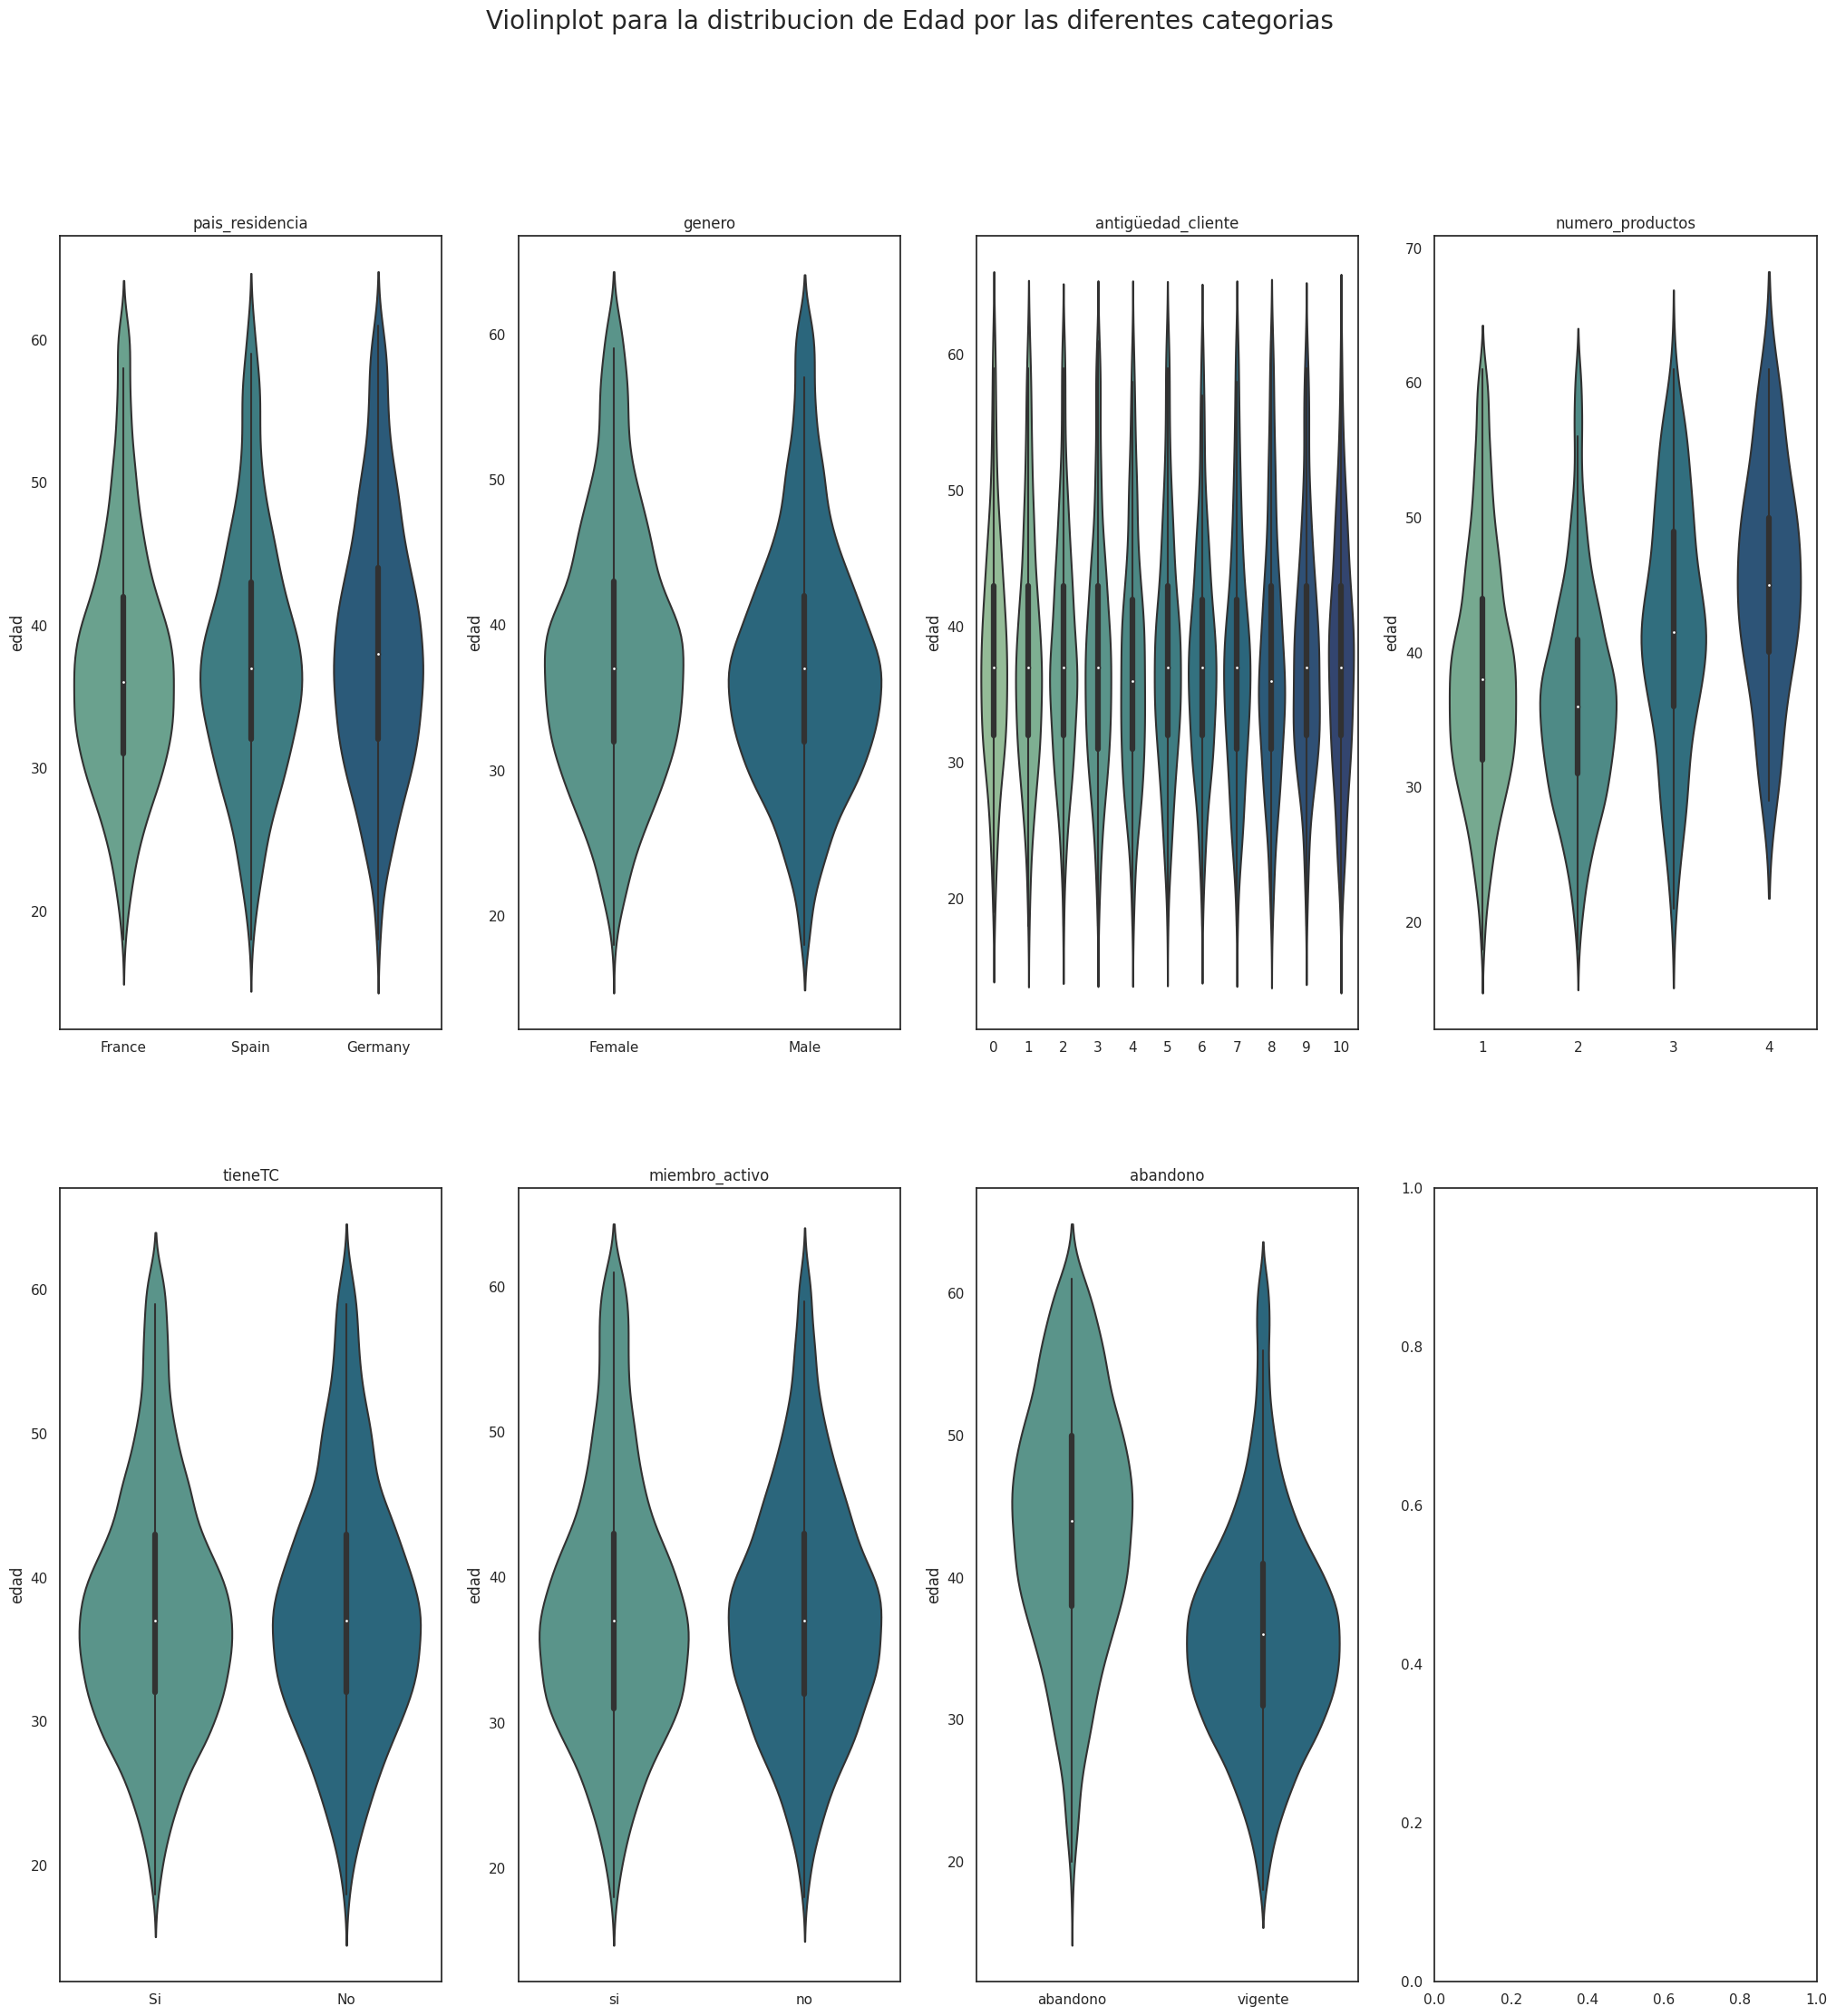

In [ ]:
sns.set(style='white')
fig, axes = plt.subplots(2, 4, figsize=(25, 25))
lista = list(df_score_filtered.columns)
i= [0,0,0,0,1,1,1,1]
j= [0,1,2,3,0,1,2,3]
lista_1 = [1,2,4,6,7,8,10]
for n in range(0,7):
    m = lista_1[n]
    key = lista[m]
    a = i[n]
    b = j[n]
    violinplot_var_cate(df_score_filtered, key, 'edad', a, b)

fig.suptitle('Violinplot para la distribucion de Edad por las diferentes categorias', fontsize=20);

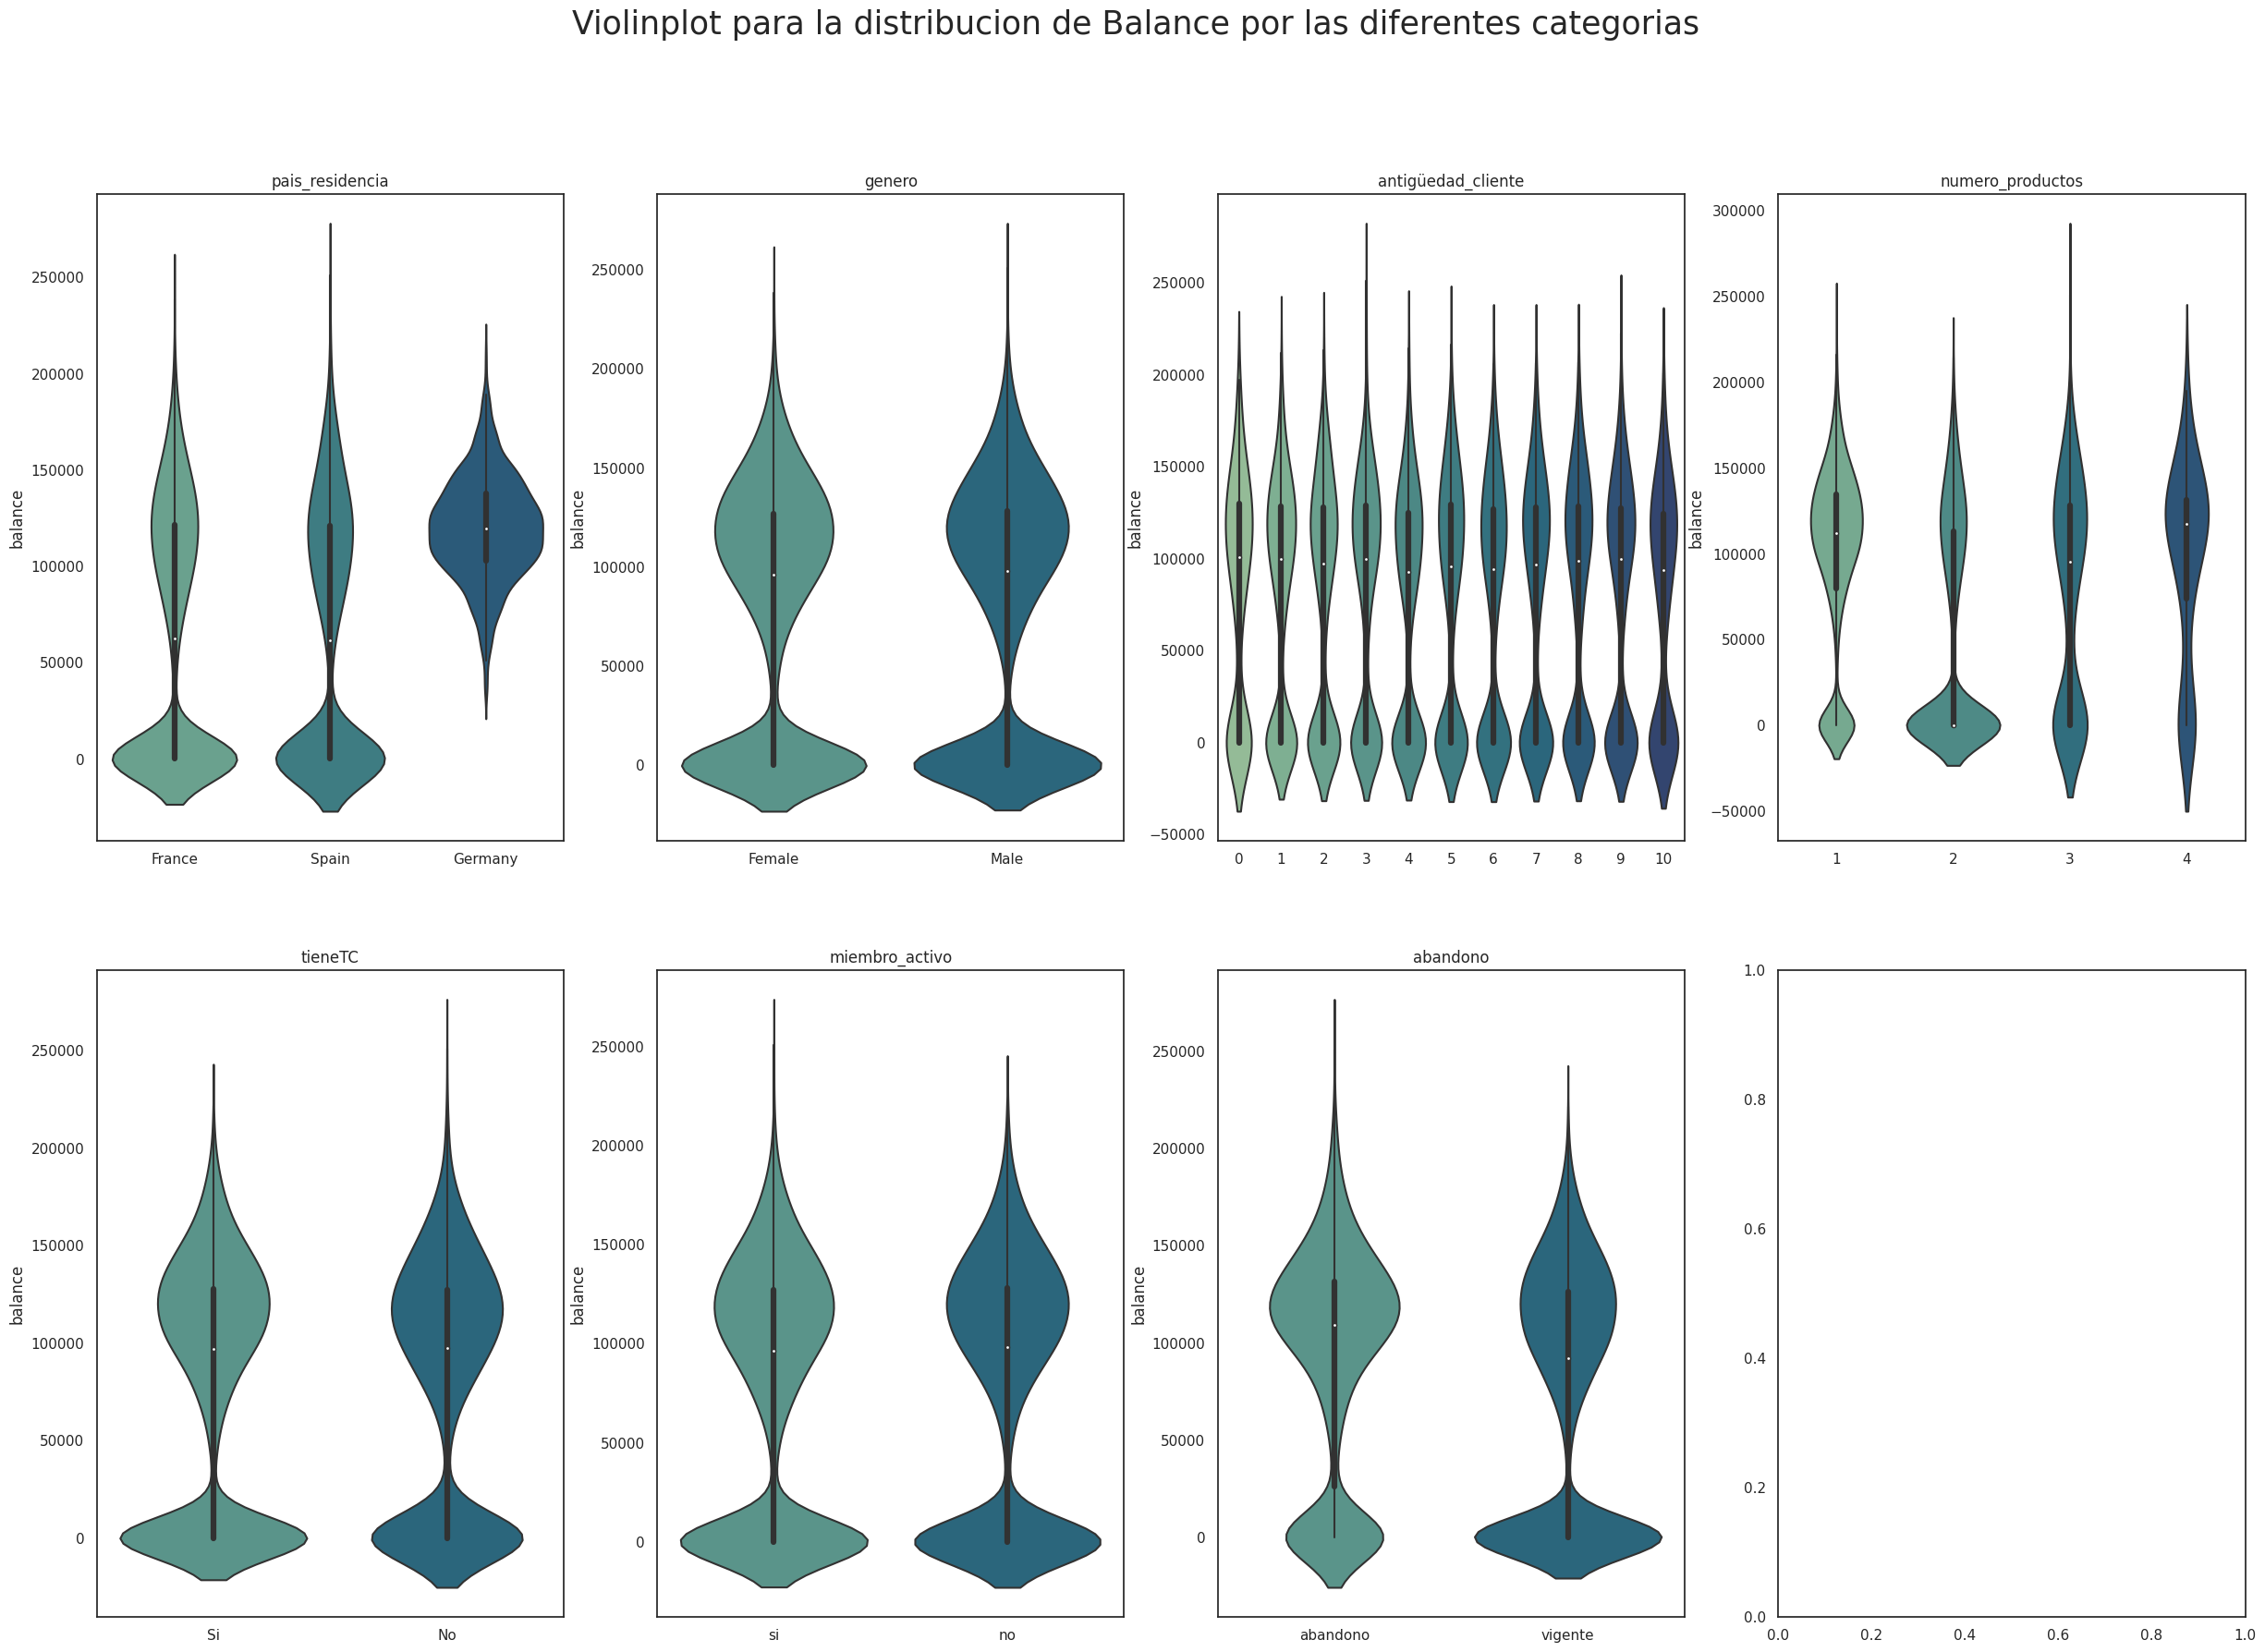

In [ ]:
sns.set(style='white')
fig, axes = plt.subplots(2, 4, figsize=(30, 20))
lista = list(df_score_filtered.columns)
i= [0,0,0,0,1,1,1,1]
j= [0,1,2,3,0,1,2,3]
lista_1 = [1,2,4,6,7,8,10]
for n in range(0,7):
    m = lista_1[n]
    key = lista[m]
    a = i[n]
    b = j[n]
    violinplot_var_cate(df_score_filtered, key, 'balance', a, b)

fig.suptitle('Violinplot para la distribucion de Balance por las diferentes categorias', fontsize=25);

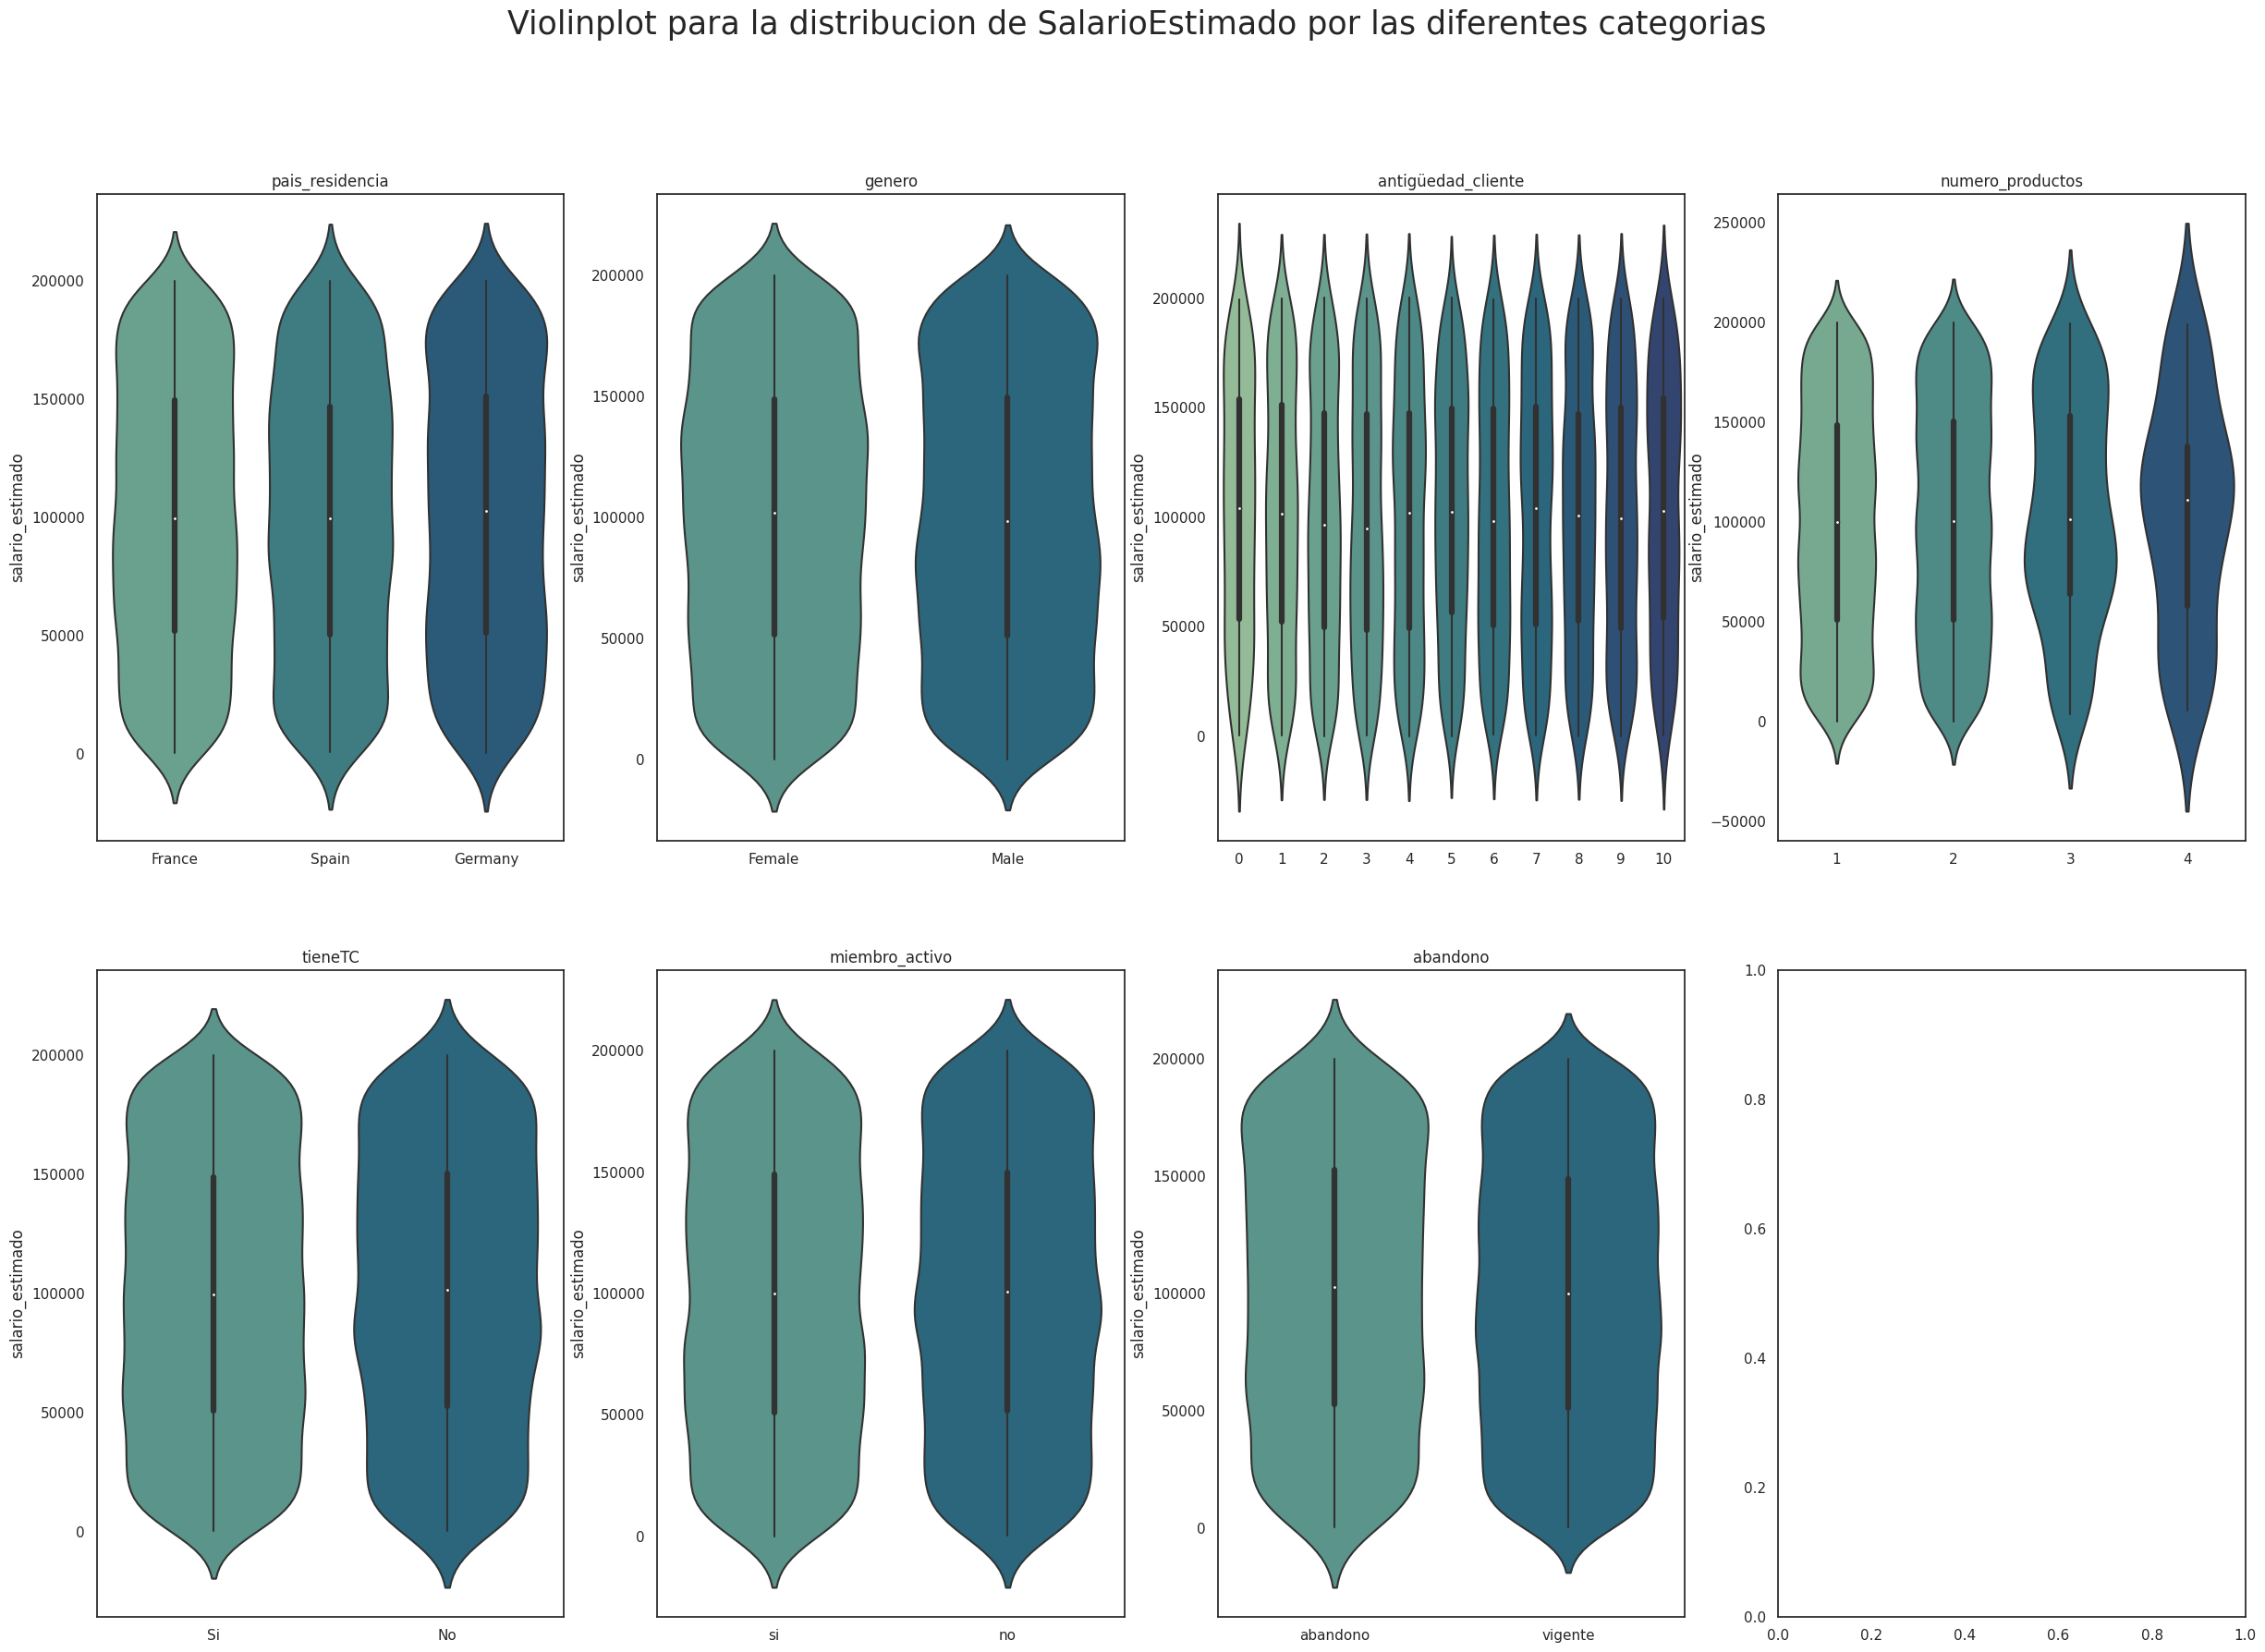

In [ ]:
sns.set(style='white')
fig, axes = plt.subplots(2, 4, figsize=(30, 20))
lista = list(df_score_filtered.columns)
i= [0,0,0,0,1,1,1,1]
j= [0,1,2,3,0,1,2,3]
lista_1 = [1,2,4,6,7,8,10]
for n in range(0,7):
    m = lista_1[n]
    key = lista[m]
    a = i[n]
    b = j[n]
    violinplot_var_cate(df_score_filtered, key, 'salario_estimado', a, b)

fig.suptitle('Violinplot para la distribucion de SalarioEstimado por las diferentes categorias', fontsize=25);

Correlación

In [ ]:
df_var_numericas = df_score.drop(columns=['abandono'])
df_var_numericas

score_crediticio  edad    balance  salario_estimado
0                  619    42       0.00         101348.88
1                  608    41   83807.86         112542.58
2                  502    42  159660.80         113931.57
3                  699    39       0.00          93826.63
4                  850    43  125510.82          79084.10
...                ...   ...        ...               ...
9995               771    39       0.00          96270.64
9996               516    35   57369.61         101699.77
9997               709    36       0.00          42085.58
9998               772    42   75075.31          92888.52
9999               792    28  130142.79          38190.78

[9589 rows x 4 columns]

In [ ]:
#Generamos matriz de correlación
df_var_numericas.corr()

score_crediticio      edad   balance  salario_estimado
score_crediticio          1.000000 -0.016371  0.007420         -0.001282
edad                     -0.016371  1.000000  0.041807         -0.003305
balance                   0.007420  0.041807  1.000000          0.010842
salario_estimado         -0.001282 -0.003305  0.010842          1.000000

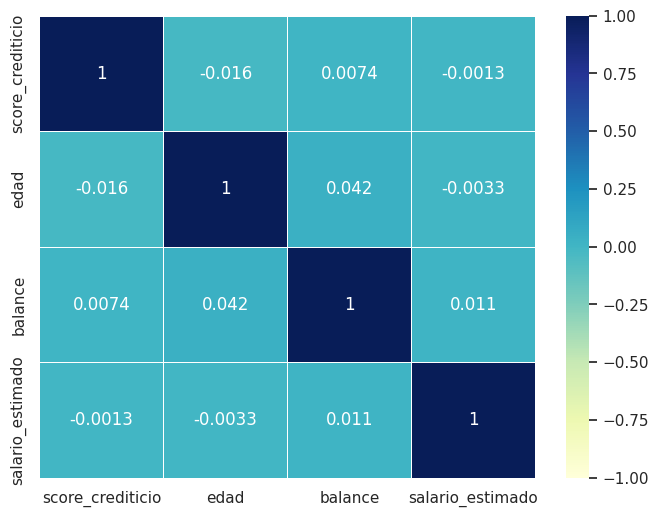

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(df_var_numericas.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5);

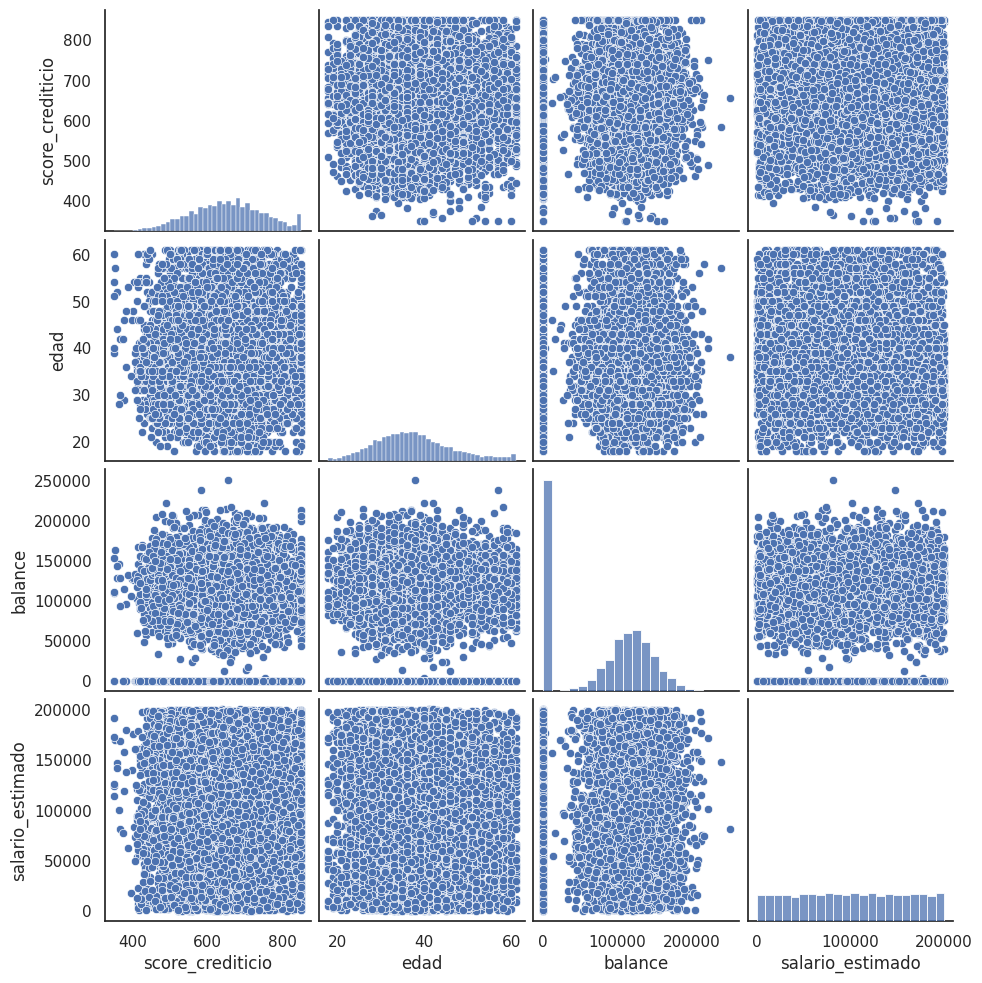

In [ ]:
sns.pairplot(df_var_numericas);

Bootstrap

In [ ]:
salario_estimado = df_score_filtered["salario_estimado"]

In [ ]:
salario_estimado.mean()

100200.27840129317

In [ ]:
#Ejecutamos 100,000 muestras de 50 elementos, a las cuales calculamos la media y almacenamos en una serie
means=[]

for i in range(100_000):
  sample = salario_estimado.sample(n=50, replace=True)
  means.append(sample.mean())

serie_means = pd.Series(means)

In [ ]:
serie_means

0         90886.9160
1         89423.2472
2        103284.2746
3         84195.6966
4        105770.6662
            ...     
99995    102282.8574
99996     98442.3376
99997     92289.6150
99998     96148.5078
99999     99960.4862
Length: 100000, dtype: float64

In [ ]:
#Calculamos y comparamos medias de locación y dispersión
print(serie_means.mean())
print(serie_means.std())
print(f'Curtosis: {kurtosis(serie_means)}')
print(f'Asimetría: {skew(serie_means)}')

100221.826368732
8153.84982434833
Curtosis: -0.03676514910361073
Asimetría: 0.003568537547527943


In [ ]:
print(df_score_filtered["salario_estimado"].mean())
print(df_score_filtered["salario_estimado"].std())
print(f'Curtosis: {kurtosis(df_score_filtered["salario_estimado"])}')
print(f'Asimetría: {skew(df_score_filtered["salario_estimado"])}')

100200.27840129317
57500.95610527151
Curtosis: -1.1802356498623188
Asimetría: -0.002565778270256815


In [ ]:
#Calculamos valores de intervalo de confianza al 95%
limite_superior= serie_means.quantile(.975)
limite_inferior= serie_means.quantile(.025)

In [ ]:
#Escribimos nuestro intervalo de confianza
print(f'El intervalo de confianza de la media es: {limite_inferior} < {salario_estimado.mean()} < {limite_superior}')

El intervalo de confianza de la media es: 84306.95086499999 < 100200.27840129317 < 116108.10529999998


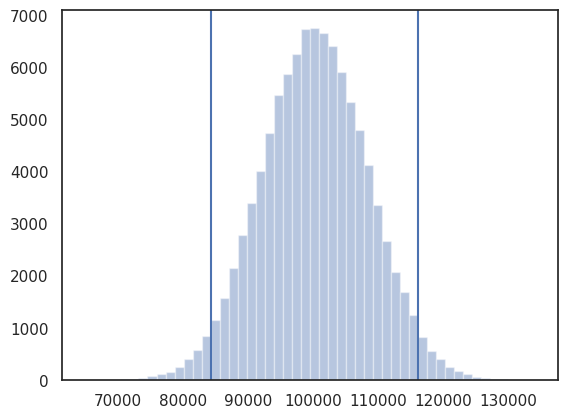

In [ ]:
#Graficamos distribución con intervalos de confianza
sns.distplot(serie_means, kde=False,norm_hist=False)
plt.axvline(limite_inferior)
plt.axvline(limite_superior)

In [ ]:
df_variables_categoricas

pais_residencia  genero  antigüedad_cliente  numero_productos tieneTC  \
0             France  Female                   2                 1      Si   
1              Spain  Female                   1                 1      No   
2             France  Female                   8                 3      Si   
3             France  Female                   1                 2      No   
4              Spain  Female                   2                 1      Si   
...              ...     ...                 ...               ...     ...   
9995          France    Male                   5                 2      Si   
9996          France    Male                  10                 1      Si   
9997          France  Female                   7                 1      No   
9998         Germany    Male                   3                 2      Si   
9999          France  Female                   4                 1      Si   

     miembro_activo  abandono  
0                si  abandono  
1                si   vigente  
2                no  abandono  
3                no   vigente  
4                si   vigente  
...             ...       ...  
9995             no   vigente  
9996             si   vigente  
9997             si  abandono  
9998             no  abandono  
9999             no   vigente  

[9589 rows x 7 columns]

In [ ]:
def crosstab_abandono (variable):
   return pd.crosstab(df_variables_categoricas[variable], df_variables_categoricas ["abandono"],normalize="index")

[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9'),
 Text(10, 0, '10')]

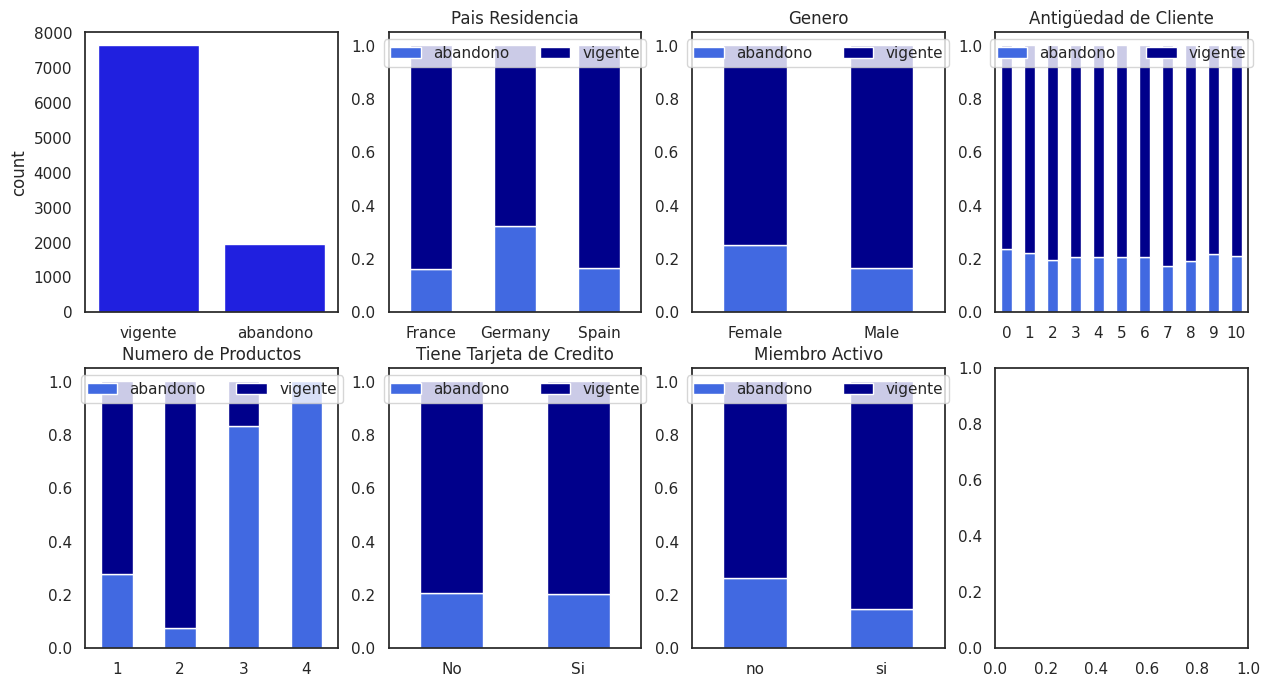

In [ ]:
fig, ((ax1,ax2,ax3,ax4), (ax5,ax6,ax7,ax8))= plt.subplots(2,4,figsize=(15,8))

sns.countplot(data=df_variables_categoricas,x="abandono", ax=ax1,order=["vigente","abandono"],color="blue")
ax1.set(xlabel="")

(crosstab_abandono("pais_residencia")
 .plot(y =crosstab_abandono("pais_residencia").columns,kind='bar', stacked=True,ax=ax2,color=["royalblue","darkblue"]))
ax2.legend(loc="upper center",ncols=2)
ax2.set(title="Pais Residencia",xlabel="")
ax2.set_xticklabels(labels=crosstab_abandono("pais_residencia").index,rotation=0)

(crosstab_abandono("genero")
 .plot(y =crosstab_abandono("genero").columns,kind='bar', stacked=True,ax=ax3,color=["royalblue","darkblue"]))
ax3.legend(loc="upper center",ncols=2)
ax3.set(title="Genero",xlabel="")
ax3.set_xticklabels(labels=crosstab_abandono("genero").index,rotation=0)

(crosstab_abandono("numero_productos")
 .plot(y =crosstab_abandono("numero_productos").columns,kind='bar', stacked=True,ax=ax5,color=["royalblue","darkblue"]))
ax5.legend(loc="upper center",ncols=2)
ax5.set(title="Numero de Productos",xlabel="")
ax5.set_xticklabels(labels=crosstab_abandono("numero_productos").index,rotation=0)

(crosstab_abandono("miembro_activo")
 .plot(y =crosstab_abandono("miembro_activo").columns,kind='bar', stacked=True,ax=ax7,color=["royalblue","darkblue"]))
ax7.legend(loc="upper center",ncols=2)
ax7.set(title="Miembro Activo",xlabel="")
ax7.set_xticklabels(labels=crosstab_abandono("miembro_activo").index,rotation=0)

(crosstab_abandono("tieneTC")
 .plot(y =crosstab_abandono("tieneTC").columns,kind='bar', stacked=True,ax=ax6,color=["royalblue","darkblue"]))
ax6.legend(loc="upper center",ncols=2)
ax6.set(title="Tiene Tarjeta de Credito",xlabel="")
ax6.set_xticklabels(labels=crosstab_abandono("tieneTC").index,rotation=0)

(crosstab_abandono("antigüedad_cliente")
 .plot(y =crosstab_abandono("antigüedad_cliente").columns,kind='bar', stacked=True,ax=ax4,color=["royalblue","darkblue"]))
ax4.legend(loc="upper center",ncols=2)
ax4.set(title="Antigüedad de Cliente",xlabel="")
ax4.set_xticklabels(labels=crosstab_abandono("antigüedad_cliente").index,rotation=0)


> ### **Machine Learning**

> Transformación de datos

In [ ]:
df_filtered

score_crediticio pais_residencia  genero  edad  antigüedad_cliente  \
0                  619          France  Female    42                   2   
1                  608           Spain  Female    41                   1   
2                  502          France  Female    42                   8   
3                  699          France  Female    39                   1   
4                  850           Spain  Female    43                   2   
...                ...             ...     ...   ...                 ...   
9995               771          France    Male    39                   5   
9996               516          France    Male    35                  10   
9997               709          France  Female    36                   7   
9998               772         Germany    Male    42                   3   
9999               792          France  Female    28                   4   

        balance  numero_productos  tieneTC  miembro_activo  salario_estimado  \
0          0.00                 1        1               1         101348.88   
1      83807.86                 1        0               1         112542.58   
2     159660.80                 3        1               0         113931.57   
3          0.00                 2        0               0          93826.63   
4     125510.82                 1        1               1          79084.10   
...         ...               ...      ...             ...               ...   
9995       0.00                 2        1               0          96270.64   
9996   57369.61                 1        1               1         101699.77   
9997       0.00                 1        0               1          42085.58   
9998   75075.31                 2        1               0          92888.52   
9999  130142.79                 1        1               0          38190.78   

      abandono  
0            1  
1            0  
2            1  
3            0  
4            0  
...        ...  
9995         0  
9996         0  
9997         1  
9998         1  
9999         0  

[10000 rows x 11 columns]

In [ ]:
#Categorizamos score crediticio
df_filtered.loc[(df_filtered['score_crediticio'] < 580), "score_level"] = "Malo"
df_filtered.loc[(df_filtered['score_crediticio'] >= 580) & (df_filtered['score_crediticio'] <= 734), "score_level"] = "Bueno"
df_filtered.loc[(df_filtered['score_crediticio'] > 734), "score_level"] = "Excelente"

In [ ]:
#Dividimos numero_productos en 3 categorías, dada la proporción englobamos todo lo referente a más de 2 productos
df_filtered.loc[(df_filtered['numero_productos'] ==1), "numero_produc"] = "1prod"
df_filtered.loc[(df_filtered['numero_productos'] ==2), "numero_produc"] = "2prod"
df_filtered.loc[(df_filtered['numero_productos'] >2), "numero_produc"] = "3prod+"

In [ ]:
#Transformamos variables categóricas a numéricas con get_dummies

df_dummies=pd.get_dummies(df_filtered)

In [ ]:
df_train = df_dummies.drop(columns=["abandono","antigüedad_cliente","score_crediticio","numero_productos"])
df_train

edad    balance  tieneTC  miembro_activo  salario_estimado  \
0       42       0.00        1               1         101348.88   
1       41   83807.86        0               1         112542.58   
2       42  159660.80        1               0         113931.57   
3       39       0.00        0               0          93826.63   
4       43  125510.82        1               1          79084.10   
...    ...        ...      ...             ...               ...   
9995    39       0.00        1               0          96270.64   
9996    35   57369.61        1               1         101699.77   
9997    36       0.00        0               1          42085.58   
9998    42   75075.31        1               0          92888.52   
9999    28  130142.79        1               0          38190.78   

      pais_residencia_France  pais_residencia_Germany  pais_residencia_Spain  \
0                          1                        0                      0   
1                          0                        0                      1   
2                          1                        0                      0   
3                          1                        0                      0   
4                          0                        0                      1   
...                      ...                      ...                    ...   
9995                       1                        0                      0   
9996                       1                        0                      0   
9997                       1                        0                      0   
9998                       0                        1                      0   
9999                       1                        0                      0   

      genero_Female  genero_Male  score_level_Bueno  score_level_Excelente  \
0                 1            0                  1                      0   
1                 1            0                  1                      0   
2                 1            0                  0                      0   
3                 1            0                  1                      0   
4                 1            0                  0                      1   
...             ...          ...                ...                    ...   
9995              0            1                  0                      1   
9996              0            1                  0                      0   
9997              1            0                  1                      0   
9998              0            1                  0                      1   
9999              1            0                  0                      1   

      score_level_Malo  numero_produc_1prod  numero_produc_2prod  \
0                    0                    1                    0   
1                    0                    1                    0   
2                    1                    0                    0   
3                    0                    0                    1   
4                    0                    1                    0   
...                ...                  ...                  ...   
9995                 0                    0                    1   
9996                 1                    1                    0   
9997                 0                    1                    0   
9998                 0                    0                    1   
9999                 0                    1                    0   

      numero_produc_3prod+  
0                        0  
1                        0  
2                        1  
3                        0  
4                        0  
...                    ...  
9995                     0  
9996                     0  
9997                     0  
9998                     0  
9999                     0  

[10000 rows x 16 columns]

In [ ]:
#Aplicamos clipping a la variable Edad

def clip_features(df, iqr_score, clip_top, clip_bottom):
  iqr = df.quantile(0.75) - df.quantile(0.25)
  limite_superior = df.quantile(0.75) + (iqr * iqr_score)
  limite_inferior = df.quantile(0.25) - (iqr * iqr_score)

  new_df = df.copy()

  if (clip_top):
    new_df = np.where(new_df > limite_superior, limite_superior, new_df)
  if (clip_bottom):
    new_df = np.where(new_df < limite_inferior, limite_inferior, new_df)

  return new_df

In [ ]:
df_train["edad"] = clip_features(df_train["edad"], 1.5, True, True)
df_train

edad    balance  tieneTC  miembro_activo  salario_estimado  \
0     42.0       0.00        1               1         101348.88   
1     41.0   83807.86        0               1         112542.58   
2     42.0  159660.80        1               0         113931.57   
3     39.0       0.00        0               0          93826.63   
4     43.0  125510.82        1               1          79084.10   
...    ...        ...      ...             ...               ...   
9995  39.0       0.00        1               0          96270.64   
9996  35.0   57369.61        1               1         101699.77   
9997  36.0       0.00        0               1          42085.58   
9998  42.0   75075.31        1               0          92888.52   
9999  28.0  130142.79        1               0          38190.78   

      pais_residencia_France  pais_residencia_Germany  pais_residencia_Spain  \
0                          1                        0                      0   
1                          0                        0                      1   
2                          1                        0                      0   
3                          1                        0                      0   
4                          0                        0                      1   
...                      ...                      ...                    ...   
9995                       1                        0                      0   
9996                       1                        0                      0   
9997                       1                        0                      0   
9998                       0                        1                      0   
9999                       1                        0                      0   

      genero_Female  genero_Male  score_level_Bueno  score_level_Excelente  \
0                 1            0                  1                      0   
1                 1            0                  1                      0   
2                 1            0                  0                      0   
3                 1            0                  1                      0   
4                 1            0                  0                      1   
...             ...          ...                ...                    ...   
9995              0            1                  0                      1   
9996              0            1                  0                      0   
9997              1            0                  1                      0   
9998              0            1                  0                      1   
9999              1            0                  0                      1   

      score_level_Malo  numero_produc_1prod  numero_produc_2prod  \
0                    0                    1                    0   
1                    0                    1                    0   
2                    1                    0                    0   
3                    0                    0                    1   
4                    0                    1                    0   
...                ...                  ...                  ...   
9995                 0                    0                    1   
9996                 1                    1                    0   
9997                 0                    1                    0   
9998                 0                    0                    1   
9999                 0                    1                    0   

      numero_produc_3prod+  
0                        0  
1                        0  
2                        1  
3                        0  
4                        0  
...                    ...  
9995                     0  
9996                     0  
9997                     0  
9998                     0  
9999                     0  

[10000 rows x 16 columns]

<Axes: >

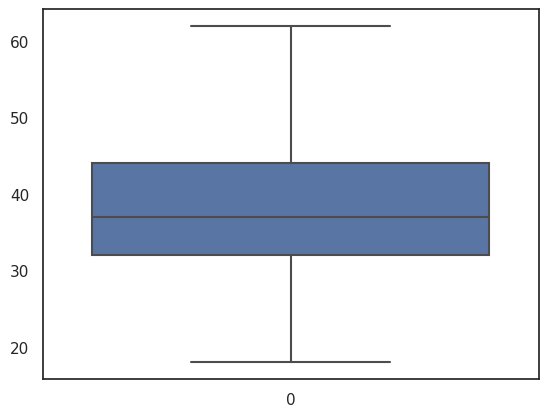

In [ ]:
sns.boxplot(df_train["edad"])

In [ ]:
#Definimos variable a predecir (y) y eliminamos del dataset para entrenamiento
y=df_dummies["abandono"]
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: abandono, Length: 10000, dtype: int64

In [ ]:
# Aplicar método SMOTE para balanceo de clases
from imblearn.over_sampling import SMOTE
s=SMOTE()
x_data,y_data=s.fit_resample(df_train,y)

In [ ]:
num_columns = ["salario_estimado",
 'edad',
 'balance']

Regresión Logística

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
logn=LogisticRegression(max_iter = 100000)

In [ ]:
X_train, X_test, y_train,y_test =  train_test_split(x_data,y_data,test_size=0.2,random_state=0)

In [ ]:
num_columns

['salario_estimado', 'edad', 'balance']

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train[num_columns])
X_train[num_columns] = scaler.transform(X_train[num_columns])
X_test[num_columns] = scaler.transform(X_test[num_columns])

In [ ]:
X_train

edad   balance  tieneTC  miembro_activo  salario_estimado  \
10919  0.851055  1.193307        0               0          1.597783   
2339  -1.569321  1.060799        0               0          0.725072   
12854 -0.402822 -1.326858        1               0          1.415688   
125    0.117862  1.151185        1               0          0.176045   
15084 -0.949890  0.935187        1               0         -0.831123   
...         ...       ...      ...             ...               ...   
13123  0.109409 -1.326858        0               0         -1.090949   
3264  -0.620281  1.291982        1               0          1.416482   
9845  -0.303934 -1.326858        1               1          0.846857   
10799  0.015649 -1.326858        0               1          0.104993   
2732   0.750556  0.428133        1               0          0.325774   

       pais_residencia_France  pais_residencia_Germany  pais_residencia_Spain  \
10919                       0                        0                      0   
2339                        0                        1                      0   
12854                       1                        0                      0   
125                         1                        0                      0   
15084                       1                        0                      0   
...                       ...                      ...                    ...   
13123                       0                        0                      1   
3264                        1                        0                      0   
9845                        0                        0                      1   
10799                       1                        0                      0   
2732                        0                        1                      0   

       genero_Female  genero_Male  score_level_Bueno  score_level_Excelente  \
10919              1            0                  1                      0   
2339               0            1                  1                      0   
12854              0            0                  0                      0   
125                0            1                  0                      0   
15084              0            1                  1                      0   
...              ...          ...                ...                    ...   
13123              0            0                  0                      0   
3264               0            1                  0                      1   
9845               1            0                  1                      0   
10799              0            1                  1                      0   
2732               1            0                  1                      0   

       score_level_Malo  numero_produc_1prod  numero_produc_2prod  \
10919                 0                    0                    0   
2339                  0                    1                    0   
12854                 1                    0                    0   
125                   1                    1                    0   
15084                 0                    1                    0   
...                 ...                  ...                  ...   
13123                 0                    0                    0   
3264                  0                    0                    1   
9845                  0                    0                    1   
10799                 0                    0                    0   
2732                  0                    1                    0   

       numero_produc_3prod+  
10919                     1  
2339                      0  
12854                     0  
125                       0  
15084                     0  
...                     ...  
13123                     0  
3264                      0  
9845                      0  
10799                     0  
2732                      0  

[12740 rows x 16 columns]

In [ ]:
logn.fit(X_train,y_train)

LogisticRegression(max_iter=100000)

In [ ]:
#Ya con el modelo entrenado realizamos predicciones
y_pred=logn.predict(X_test)
y_pred

array([1, 1, 1, ..., 0, 1, 0])

In [ ]:
#Calculamos exactitud del modelo
logn.score(X_test,y_test)

0.8948524795982423

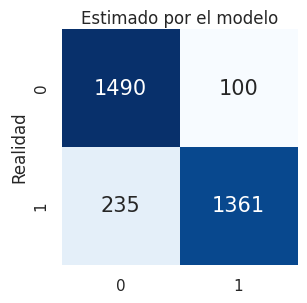

In [ ]:
#Generamos la matriz gráficamente

class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(3, 3))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred)), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 15})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=12, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=12);

In [ ]:
def calcular_exactitud(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = accuracy * 100
    return accuracy

def calcular_sensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad

def calcular_especificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

def evaluar_modelo(y_test, y_pred):
  matrix = confusion_matrix(y_test, y_pred)
  (TN, FP, FN, TP) = matrix.ravel()

  print(f"Exactitud: {calcular_exactitud(TP, TN, FP, FN)}")
  print(f"Sensibilidad: {calcular_sensibilidad(TP, TN, FP, FN)}")
  print(f"Especificidad: {calcular_especificidad(TP, TN, FP, FN)}")

In [ ]:
evaluar_modelo(y_test, y_pred)

Exactitud: 89.48524795982424
Sensibilidad: 85.27568922305765
Especificidad: 93.71069182389937


## Arbol de Decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2,random_state=0)

In [ ]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = tree_clf.predict(X_test)

In [ ]:
matrix = confusion_matrix(y_test, y_pred)

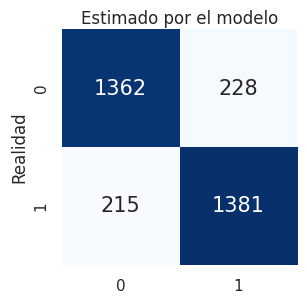

In [ ]:
#Generamos la matriz gráficamente

class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(3, 3))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred)), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 15})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=12, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=12);

In [ ]:
evaluar_modelo(y_test,y_pred)

Exactitud: 86.09541745134965
Sensibilidad: 86.52882205513784
Especificidad: 85.66037735849056


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1590
           1       0.86      0.87      0.86      1596

    accuracy                           0.86      3186
   macro avg       0.86      0.86      0.86      3186
weighted avg       0.86      0.86      0.86      3186



In [ ]:
scores = cross_val_score(tree_clf, X_train, y_train, scoring="recall", cv=10)
scores

array([0.89324961, 0.87284144, 0.87912088, 0.85871272, 0.8744113 ,
       0.87127159, 0.85086342, 0.86949686, 0.85849057, 0.85849057])

In [ ]:
scores.mean()

0.8686948945035198

In [ ]:
scores = cross_val_score(tree_clf, X_train, y_train, scoring="accuracy", cv=10)
scores

array([0.87833595, 0.85321821, 0.8744113 , 0.86420722, 0.86499215,
       0.87048666, 0.84379906, 0.86656201, 0.86734694, 0.87676609])

In [ ]:
scores.mean()

0.8660125588697017

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=200)

In [ ]:
X_train, X_test,y_train , y_test = train_test_split(x_data,y_data,test_size=.2,random_state=0)

In [ ]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
y_pred = rf_clf.predict(X_test)

In [ ]:
matrix = confusion_matrix(y_test, y_pred)

In [ ]:
evaluar_modelo(y_test,y_pred)

Exactitud: 90.58380414312617
Sensibilidad: 88.34586466165413
Especificidad: 92.83018867924528


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1590
           1       0.93      0.88      0.90      1596

    accuracy                           0.91      3186
   macro avg       0.91      0.91      0.91      3186
weighted avg       0.91      0.91      0.91      3186



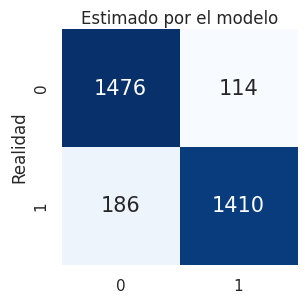

In [ ]:
#Generamos la matriz gráficamente

class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(3, 3))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred)), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 15})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=12, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=12);

In [ ]:
scores_rf_clf = cross_val_score(rf_clf, X_train, y_train, scoring="accuracy", cv=10)
scores_rf_clf

array([0.9144427 , 0.89717425, 0.90894819, 0.90345369, 0.90973312,
       0.90737834, 0.90816327, 0.90502355, 0.90659341, 0.9144427 ])

In [ ]:
scores_rf_clf.mean()

0.9075353218210361

## Evaluamos las variables más representativas

In [ ]:
importancia_predictores = pd.DataFrame(
                            {'predictor': X_train.columns,
                             'importancia': rf_clf.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


predictor  importancia
0                      edad     0.213214
14      numero_produc_2prod     0.171270
4          salario_estimado     0.109769
1                   balance     0.103900
3            miembro_activo     0.084120
13      numero_produc_1prod     0.053961
9               genero_Male     0.045772
5    pais_residencia_France     0.042671
8             genero_Female     0.038212
7     pais_residencia_Spain     0.032433
10        score_level_Bueno     0.023799
12         score_level_Malo     0.021347
11    score_level_Excelente     0.020425
6   pais_residencia_Germany     0.017426
2                   tieneTC     0.014593
15     numero_produc_3prod+     0.007088

## Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
n_estimators = [100, 500]
max_features = ['auto', 'log2']
max_depth = [3, 5]
min_samples_split = [5, 10]
min_samples_leaf = [1, 4]
bootstrap = [True]

In [ ]:
params_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

In [ ]:
grid_search_cv = GridSearchCV(rf_clf, params_grid, scoring='f1', cv=3, verbose=1, n_jobs=3)

In [ ]:
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=200), n_jobs=3,
             param_grid={'bootstrap': [True], 'max_depth': [3, 5],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': [1, 4],
                         'min_samples_split': [5, 10],
                         'n_estimators': [100, 500]},
             scoring='f1', verbose=1)

In [ ]:
best_params = grid_search_cv.best_params_

In [ ]:
rf_clf_optimized = RandomForestClassifier(**best_params)

In [ ]:
rf_clf_optimized.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features='auto', min_samples_split=5,
                       n_estimators=500)

In [ ]:
y_pred = rf_clf_optimized.predict(X_test)

In [ ]:
matrix = confusion_matrix(y_test, y_pred)

In [ ]:
evaluar_modelo(y_test,y_pred)

Exactitud: 88.1669805398619
Sensibilidad: 86.71679197994987
Especificidad: 89.62264150943396


## Naive Bayes

array([[<Axes: title={'center': 'edad'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'tieneTC'}>,
        <Axes: title={'center': 'miembro_activo'}>],
       [<Axes: title={'center': 'salario_estimado'}>,
        <Axes: title={'center': 'pais_residencia_France'}>,
        <Axes: title={'center': 'pais_residencia_Germany'}>,
        <Axes: title={'center': 'pais_residencia_Spain'}>],
       [<Axes: title={'center': 'genero_Female'}>,
        <Axes: title={'center': 'genero_Male'}>,
        <Axes: title={'center': 'score_level_Bueno'}>,
        <Axes: title={'center': 'score_level_Excelente'}>],
       [<Axes: title={'center': 'score_level_Malo'}>,
        <Axes: title={'center': 'numero_produc_1prod'}>,
        <Axes: title={'center': 'numero_produc_2prod'}>,
        <Axes: title={'center': 'numero_produc_3prod+'}>]], dtype=object)

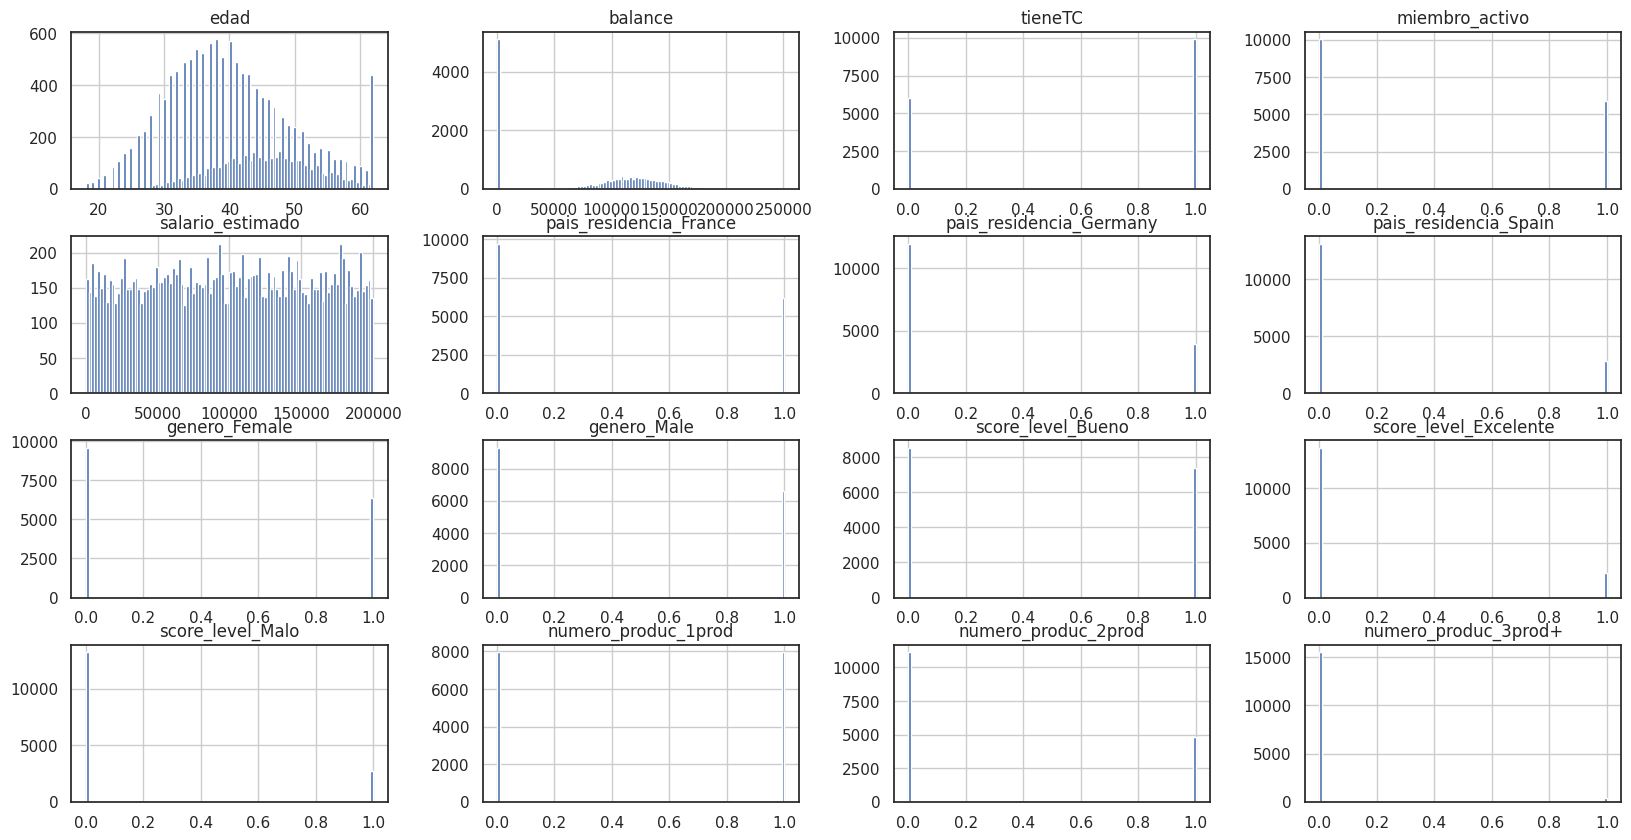

In [ ]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()
x_data.hist(bins=100, ax=ax)

In [ ]:
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train, y_train)
y_pred = gaussian_nb.predict(X_test)

In [ ]:
evaluar_modelo(y_test, y_pred)

Exactitud: 73.97991211550533
Sensibilidad: 79.13533834586465
Especificidad: 68.80503144654088


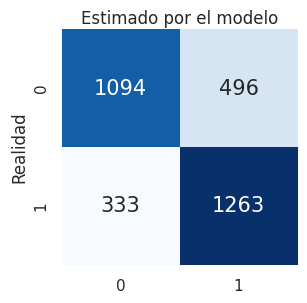

In [ ]:
#Generamos la matriz gráficamente

class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(3, 3))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred)), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 15})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=12, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=12);

In [ ]:
scores_bayes = cross_val_score(gaussian_nb, X_train, y_train, scoring="recall", cv=10)
scores_bayes

array([0.76138148, 0.74725275, 0.79591837, 0.78963893, 0.75353218,
       0.78806907, 0.79905808, 0.7908805 , 0.76415094, 0.77044025])

In [ ]:
scores_bayes.mean()

0.77603225615355

##SVC

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(kernel="rbf")
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
evaluar_modelo(y_test,y_pred)

Exactitud: 55.83804143126178
Sensibilidad: 74.62406015037594
Especificidad: 36.9811320754717


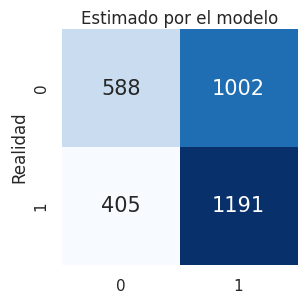

In [ ]:
#Generamos la matriz gráficamente

class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(3, 3))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred)), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 15})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=12, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=12);

In [ ]:
scores_svc = cross_val_score(svc, X_train, y_train, scoring="recall", cv=10)
scores_svc

array([0.7566719 , 0.75824176, 0.78178964, 0.75039246, 0.72684458,
       0.74725275, 0.75039246, 0.75314465, 0.74528302, 0.72169811])

In [ ]:
scores_svc.mean()

0.7491711343463365

## Red neuronal para clasificación binaria

In [ ]:
import tensorflow as tf

In [ ]:
l0 = tf.keras.layers.Dense(units=8, input_shape=[X_train.shape[1]], activation='sigmoid')
l1 = tf.keras.layers.Dense(units=16, activation='relu')
l2 = tf.keras.layers.Dense(units=1, activation='sigmoid')

In [ ]:
model = tf.keras.Sequential([l0, l1, l2])

In [ ]:
model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(0.001), metrics=["Accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=500, verbose=True, validation_split=0.1)

Epoch 1/500
359/359 [==============================] - 3s 3ms/step - loss: 0.6972 - Accuracy: 0.5585 - val_loss: 0.6839 - val_Accuracy: 0.5628
Epoch 2/500
359/359 [==============================] - 1s 3ms/step - loss: 0.6807 - Accuracy: 0.5749 - val_loss: 0.6839 - val_Accuracy: 0.5628
Epoch 3/500
359/359 [==============================] - 1s 2ms/step - loss: 0.6806 - Accuracy: 0.5746 - val_loss: 0.6842 - val_Accuracy: 0.5628
Epoch 4/500
359/359 [==============================] - 1s 2ms/step - loss: 0.6805 - Accuracy: 0.5753 - val_loss: 0.6845 - val_Accuracy: 0.5628
Epoch 5/500
359/359 [==============================] - 1s 3ms/step - loss: 0.6807 - Accuracy: 0.5753 - val_loss: 0.6848 - val_Accuracy: 0.5628
Epoch 6/500
359/359 [==============================] - 2s 4ms/step - loss: 0.6805 - Accuracy: 0.5752 - val_loss: 0.6846 - val_Accuracy: 0.5628
Epoch 7/500
359/359 [==============================] - 1s 4ms/step - loss: 0.6807 - Accuracy: 0.5750 - val_loss: 0.6847 - val_Accuracy: 0.5612

In [ ]:
y_pred = model.predict(X_test)

100/100 [==============================] - 0s 1ms/step


In [ ]:
y_pred

array([[0.55576766],
       [0.3759262 ],
       [0.55576766],
       ...,
       [0.3759262 ],
       [0.55576766],
       [0.55576766]], dtype=float32)

In [ ]:
y_pred_01 = []

for num in y_pred:
  if num[0] < 0.5:
    y_pred_01.append(0)
  else:
    y_pred_01.append(1)

In [ ]:
evaluar_modelo(y_test, y_pred_01)

Exactitud: 55.86942875078468
Sensibilidad: 74.81203007518798
Especificidad: 36.855345911949684


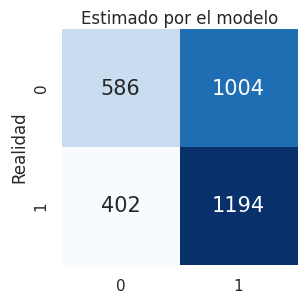

In [ ]:
#Generamos la matriz gráficamente

class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(3, 3))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred_01)), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 15})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=12, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=12);

### **Máquina de soporte vectorial lineal (Linear SVC)**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

In [ ]:
svm_clf = Pipeline([("scaler", StandardScaler()),("linear_svc", LinearSVC(C=1, loss="hinge", max_iter=100000)),])
svm_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', max_iter=100000))])

In [ ]:
y_pred= svm_clf.predict(X_test)

In [ ]:
evaluar_modelo(y_test, y_pred)

Exactitud: 89.6421845574388
Sensibilidad: 83.39598997493735
Especificidad: 95.9119496855346


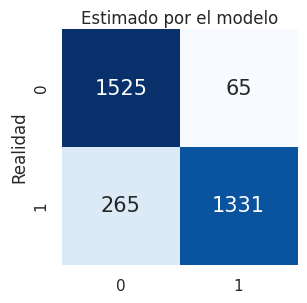

In [ ]:
#Generamos la matriz gráficamente

class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(3, 3))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred)), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 15})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=12, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=12);

In [ ]:
scores_svm = cross_val_score(svm_clf, X_train, y_train, scoring="accuracy", cv=10)
scores_svm

array([0.89403454, 0.89481947, 0.89638932, 0.90188383, 0.89638932,
       0.90973312, 0.88932496, 0.88618524, 0.89717425, 0.89481947])

In [ ]:
scores_svm.mean()

0.8960753532182103

###**Curvas ROC**

In [ ]:
def plot_roc(X_test,Y_test,models):

    #models object should be a dictionary comprising of name of model and the model object
    for name,model in models.items():

        if hasattr(model,'decision_function'):
            probs=model.decision_function(X_test)
        elif hasattr(model,'predict_proba'):
            probs=model.predict_proba(X_test)[:,1]
        fpr,tpr,threshold=roc_curve(Y_test,probs)
        roc_auc=auc(fpr,tpr)
        print('ROC AUC=%0.2f'%roc_auc)
        plt.plot(fpr,tpr,label='%s (AUC=%0.2f)'%(name,roc_auc))

    plt.legend(loc='lower right')
    plt.plot([0,1.05],[0,1],'b--')
    plt.xlim([0,1.10])
    plt.ylim([0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

ROC AUC=0.96
ROC AUC=0.80
ROC AUC=0.96
ROC AUC=0.43


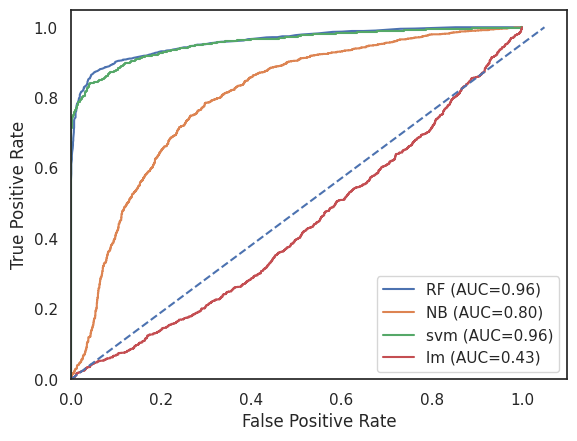

In [ ]:
models={'RF':rf_clf, 'NB':gaussian_nb, 'svm':svm_clf, 'lm':logn}
plot_roc(X_test,y_test,models);